## **1 - Perform an Explanatory data analysis (EDA) with visualization using the entire dataset**

In an EDA Process we need to:
- Understand Column Meaning
- Check Data Integrity
- Visualize Distribution
- Pair plots for Relationships

In [73]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder
import os
import requests

In [74]:
shopeasy_df = pd.read_csv('shopeasy.csv')

## 1 - Understanding Column Meaning

To analyze your dataset effectively, it is important to understand the meaning and significance of each column or attribute in our dataset, as this provides context for your data.

TO TAKE AN OVERVIEW OF THE DATA WE USED THE FOLLOWING FUNCTIONS:
df.head() ,df.info() ,df.describe() ,df.shape

 -df.head() allows us take a look at what the data looks like 

In [75]:
shopeasy_df.head()

,personId,accountTotal,frequencyIndex,itemCosts,singleItemCosts,multipleItemCosts,emergencyFunds,itemBuyFrequency,singleItemBuyFrequency,multipleItemBuyFrequency,...,emergencyCount,itemCount,maxSpendLimit,monthlyPaid,leastAmountPaid,paymentCompletionRate,accountLifespan,location,accountType,webUsage
0,C10573,1034.660626,0.833333,1308.11,1308.11,0.00,234.602843,0.500000,0.500000,0.000000,...,1,8,1500.0,236.764555,207.007715,0.00,6,New York,Premium,60
1,C16889,777.853474,0.666667,0.00,0.00,0.00,1820.143378,0.000000,0.000000,0.000000,...,8,0,2000.0,89.741508,173.276205,0.00,6,Los Angeles,Premium,5
2,C12964,97.453056,0.818182,334.73,334.73,0.00,19.551802,0.083333,0.083333,0.000000,...,1,1,2500.0,234.271939,117.297542,0.25,12,New York,Student,21
3,C11171,0.000000,0.000000,12.65,0.00,12.65,0.000000,0.083333,0.000000,0.083333,...,0,1,5000.0,0.000000,NaN,0.00,12,Chicago,Premium,53
4,C17582,18.120946,0.500000,57.00,57.00,0.00,0.000000,0.166667,0.166667,0.000000,...,0,1,1500.0,118.438703,54.138711,0.00,6,New York,Premium,59


ShopEasy dataset is the collection of all the user data used which allows differentiation of customer behavior and interface uses. The data will gives a real clue of the customers' behaviors, for instance how they discover the product, what they do and where they go on the website. With data being analyzed, the businesses can gain more knowledge about their consumers' choices, improve their website's user experience, and develop a data-driven plan to be more effective than ever before.
 
Here's a breakdown of each feature:

- **personId**: A unique identifier assigned to each user

- **accountTotal**: This represents the total amount a user has spent on ShopEasy since their account was created. 

- **frequencyIndex**: A numerical value indicating how frequently a user shops. A value of 1 denotes very frequent shopping, while values less than 1 indicate less frequent shopping.

- **itemCosts**: The cumulative cost of all items a user has purchased. 

- **singleItemCosts**: The costs of items bought in a single transaction without using installment plans. 

- **multipleItemCosts**: The costs of items that users have chosen to pay for in installments. 

- **emergencyFunds**: The amount of money a user keeps in their ShopEasy wallet as a reserve for quick checkouts or emergency situations.

- **itemBuyFrequency**: How often a user makes purchases, providing insight into customer engagement with the platform.

- **singleItemBuyFrequency**: The frequency of making single-item purchases without installment plans, which can indicate impulse buying or specific needs.

- **multipleItemBuyFrequency**: Frequency of opting for installment-based purchases.

- **emergencyUseFrequency**: How often a user dips into their emergency funds.

- **emergencyCount**: The number of times emergency funds have been used.

- **itemCount**: Total number of items a user has purchased, which helps in understanding purchasing habits and product preferences.

- **maxSpendLimit**: The maximum spending limit set by ShopEasy for a user, based on their buying behavior and loyalty. It's a risk management measure.

- **monthlyPaid**: The total amount a user pays on the platform each month, useful for understanding user spending patterns over time.

- **leastAmountPaid**: The smallest amount paid by the user in a single transaction.

- **paymentCompletionRate**: The percentage of purchases where the user has completed payment in full.

- **accountLifespan**: The duration for which the user has been registered on ShopEasy.

- **location**: The user's city or region, which can be crucial for regional marketing strategies and understanding geographical preferences.

- **accountType**: Categorizes users into 'Regular', 'Premium' (those with premium services), and 'Student' (registered with a student ID), indicating different user segments.

- **webUsage**: A score from 0 to 100 representing how frequently a user shops via web browsers. A higher score suggests more frequent web usage.

 -df.info() method is useful to get a quick description of the data, in particular the
total number of rows, each attribute’s type, and the number of non-null values.

In [76]:
shopeasy_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   personId                  8950 non-null   object 
 1   accountTotal              8950 non-null   float64
 2   frequencyIndex            8950 non-null   float64
 3   itemCosts                 8950 non-null   float64
 4   singleItemCosts           8950 non-null   float64
 5   multipleItemCosts         8950 non-null   float64
 6   emergencyFunds            8950 non-null   float64
 7   itemBuyFrequency          8950 non-null   float64
 8   singleItemBuyFrequency    8950 non-null   float64
 9   multipleItemBuyFrequency  8950 non-null   float64
 10  emergencyUseFrequency     8950 non-null   float64
 11  emergencyCount            8950 non-null   int64  
 12  itemCount                 8950 non-null   int64  
 13  maxSpendLimit             8949 non-null   float64
 14  monthlyP

-df.describe() gives us some basic statistical details

In [77]:
shopeasy_df.describe()

,accountTotal,frequencyIndex,itemCosts,singleItemCosts,multipleItemCosts,emergencyFunds,itemBuyFrequency,singleItemBuyFrequency,multipleItemBuyFrequency,emergencyUseFrequency,emergencyCount,itemCount,maxSpendLimit,monthlyPaid,leastAmountPaid,paymentCompletionRate,accountLifespan,webUsage
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318,49.422570
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331,28.808219
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000,0.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000,24.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000,49.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000,74.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000,99.000000


 -df.shape gives us  the shape of our DataFrame. From the output we can see that we have 21 columns and 8950 rows.

In [78]:
shopeasy_df.shape

(8950, 21)

We now have a look at the number of rows too.

## 2- Checking Data Integrity

The 'personId' column includes unique identifiers for each person (like customer ids). These identifiers are instruments used for the role of indicating a single record but do not have any added support for the data mining process or to statistical analysis, visualization, and machine learning models.

In [79]:
shopeasy_df = shopeasy_df.drop(columns=['personId'])

Check for missing values

In [80]:
# Check for missing values
missing_values = shopeasy_df.isnull().sum()
missing_values

accountTotal                  0
frequencyIndex                0
itemCosts                     0
singleItemCosts               0
multipleItemCosts             0
emergencyFunds                0
itemBuyFrequency              0
singleItemBuyFrequency        0
multipleItemBuyFrequency      0
emergencyUseFrequency         0
emergencyCount                0
itemCount                     0
maxSpendLimit                 1
monthlyPaid                   0
leastAmountPaid             313
paymentCompletionRate         0
accountLifespan               0
location                      0
accountType                   0
webUsage                      0
dtype: int64

We have missing values!!

That is why we resort to using **Missingno** which is a Python library that helps visualize and analyze missing data in datasets. It provides visualizations and tools to gain insights into missing values, including:

- **Matrix Plot:** Visual representation of missing values in the dataset, revealing patterns and areas with high or low missingness.
- **Bar Chart:** Displays the number of missing values per column, giving an overview of missing data across attributes.
- **Heatmap:** Visualizes the correlation between missing values in pairs of columns, identifying relationships between missingness in different variables.


**Data Cleaning**: Missingno is beneficial for the data cleaning process, highlighting the columns that have significant amounts of missing data and may need further attention, either through imputation or removal.

In [81]:
import missingno as msno

**Matrix Plot**

<Axes: >

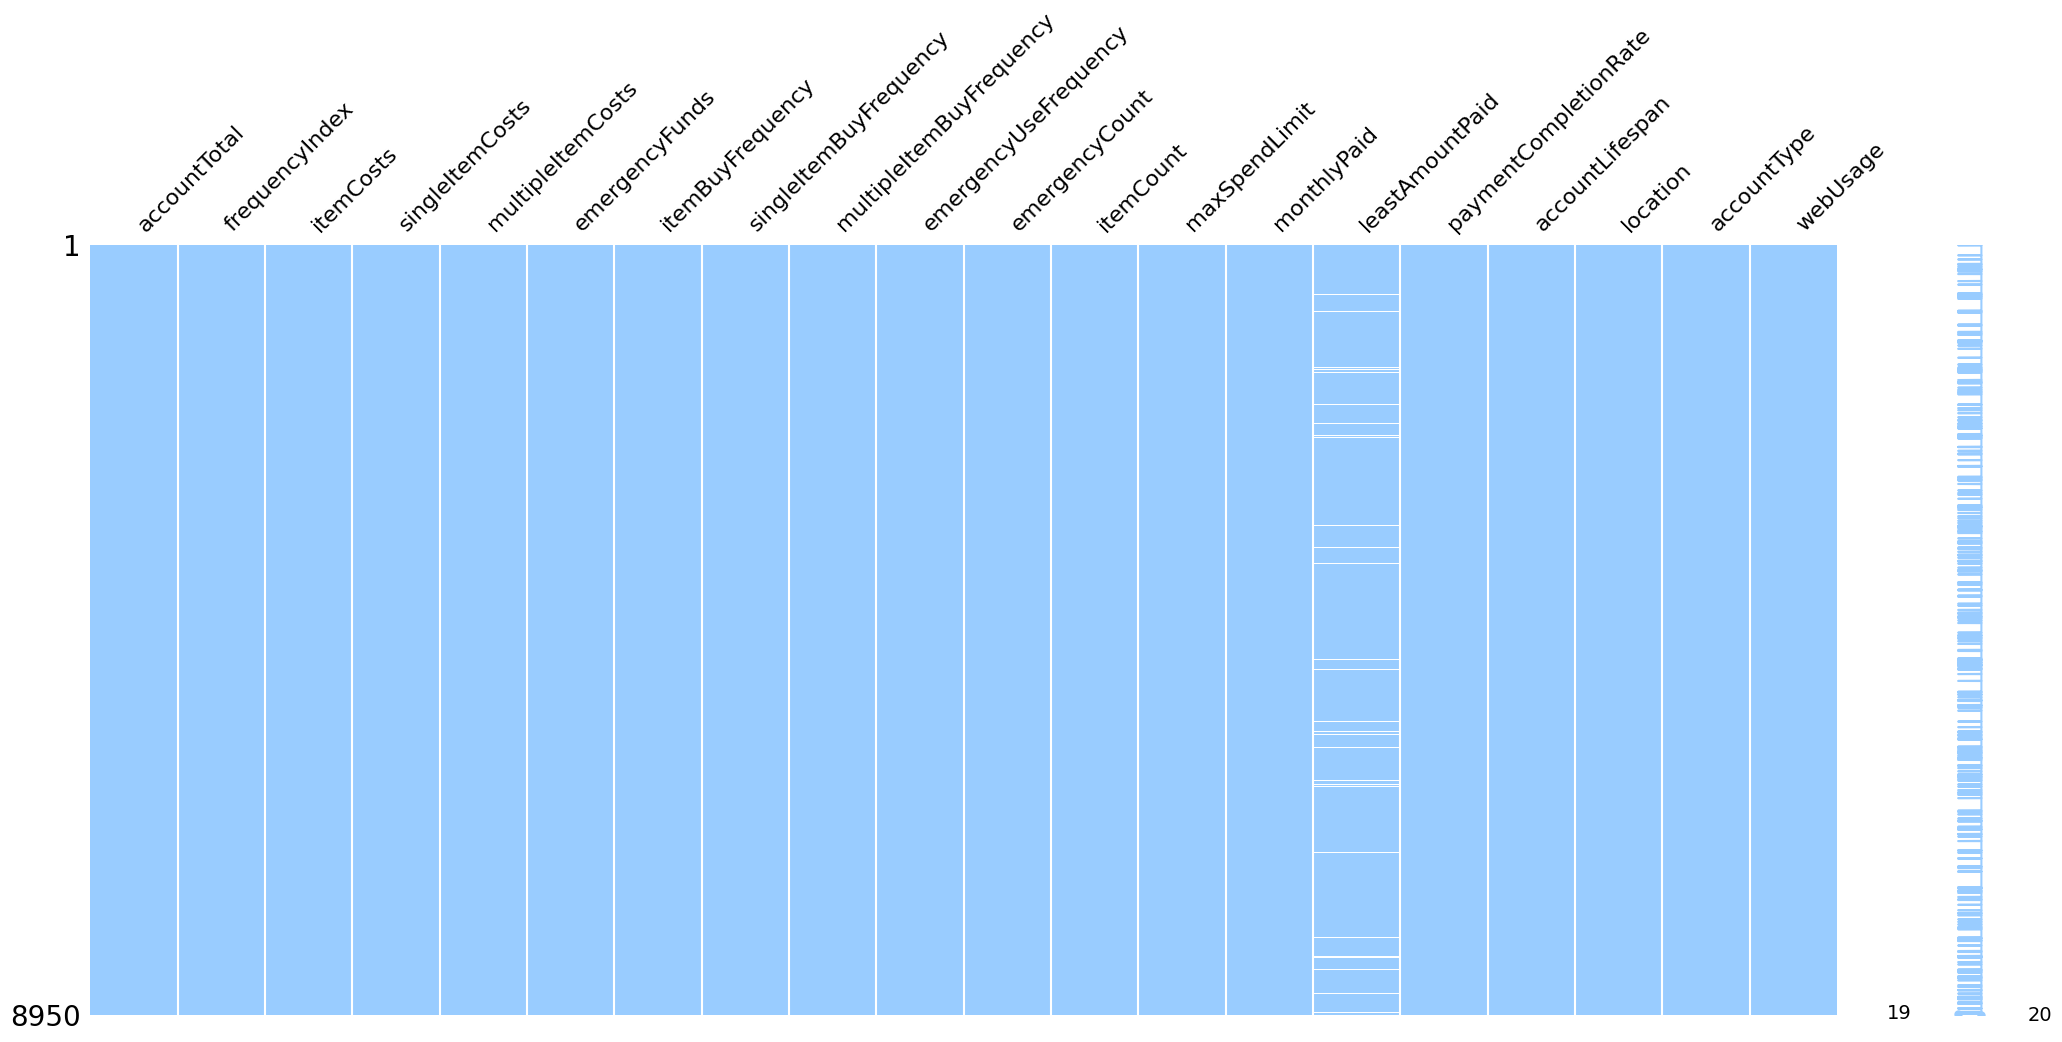

In [82]:
msno.matrix(shopeasy_df, color=(0.6, 0.8, 1))

**Barchart**

<Axes: >

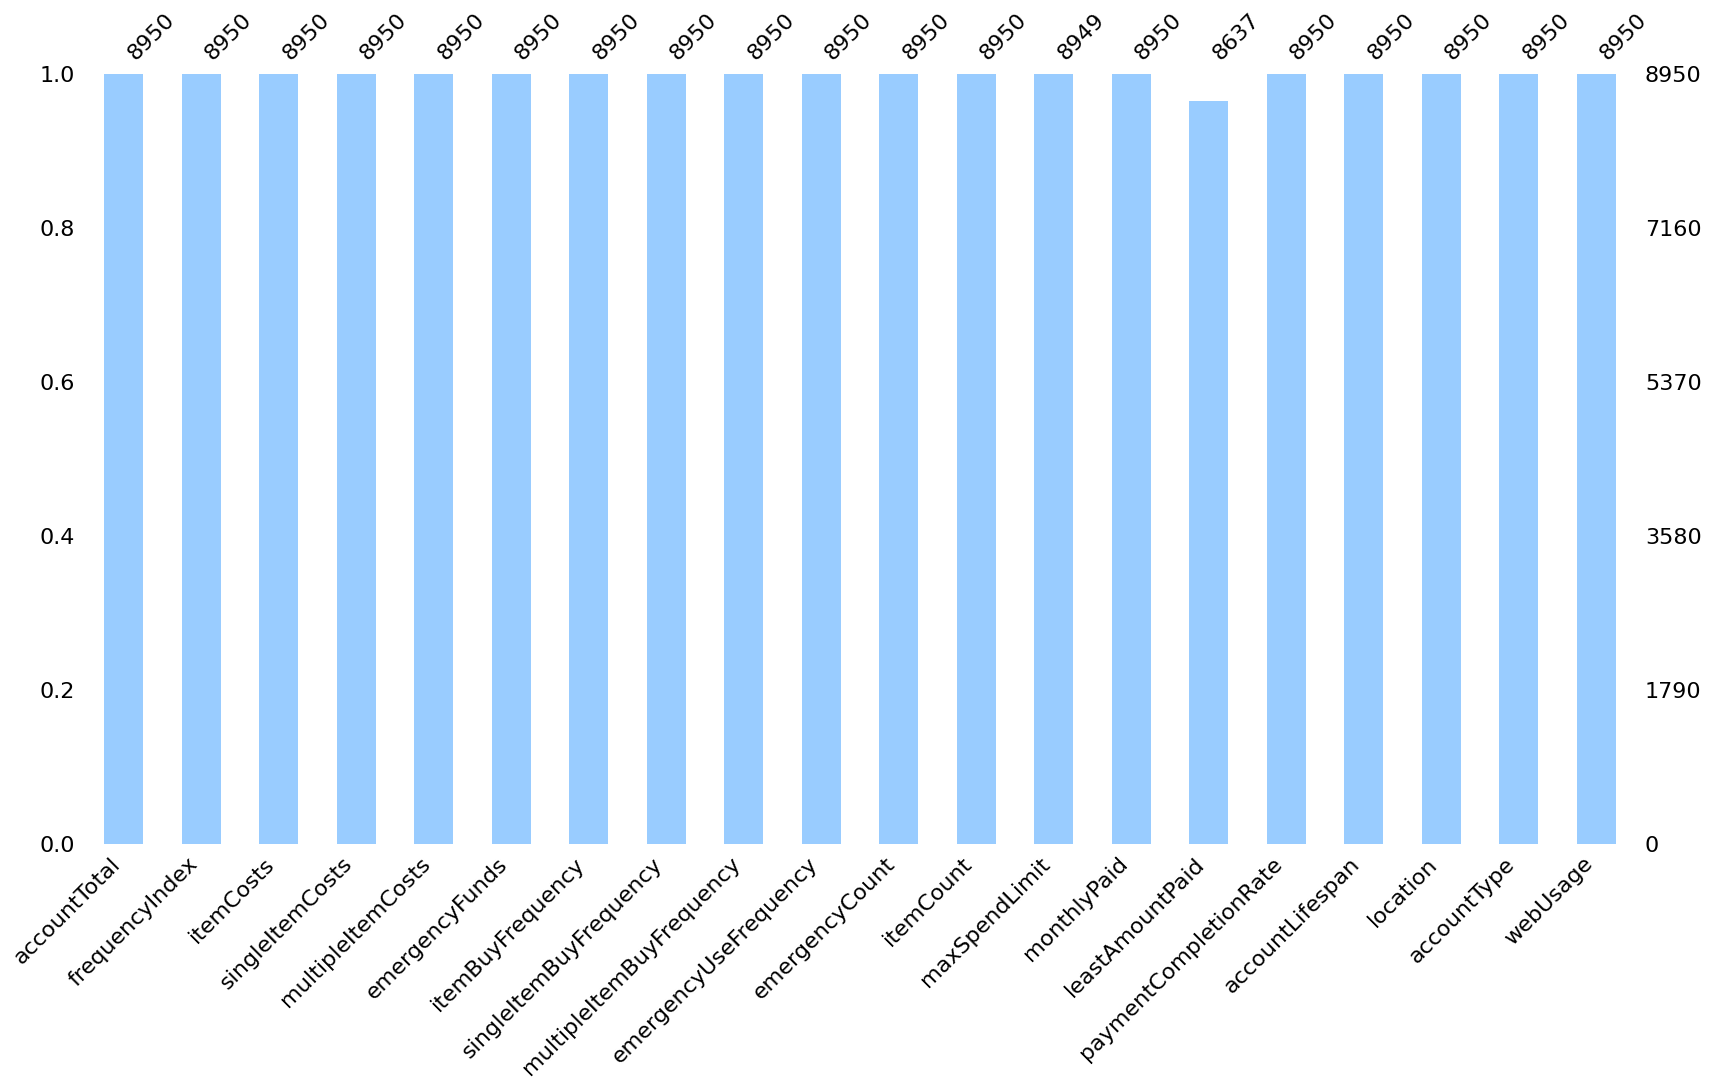

In [83]:
msno.bar(shopeasy_df, color= (0.6, 0.8, 1), figsize= (20,10) , labels=True)

In [84]:
def missing_values_table(df):
        mis_val = df.isnull().sum()

        # Percentage of missing values
        mis_val_percent = 100 * df.isnull().sum() / len(df)

        # Table with the results
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)

        # Rename the columns
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})

        # Sort the table by percentage of missing descending
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)

        # Summary information
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")

        # Return the dataframe with missing information
        return mis_val_table_ren_columns

missing_values_table(shopeasy_df)

Your selected dataframe has 20 columns.
There are 2 columns that have missing values.


,Missing Values,% of Total Values
leastAmountPaid,313,3.5
maxSpendLimit,1,0.0


**Investigate Missing Data**
We need to know whether the missingness of the data is random or systematic. Specifically we aim to determine whether the absence of data in the columns follow a specific structure or if it occur entirely at random. It is crucial since it can help us make informed decisions about how to handle missing data effectively.

In order to do this, we will follow the following steps:
- **Distribution Analysis**: we analyze the distribution of missing values in the specified column.
- **Comparison of Distribution**: we compare the value distributions of the dataset made up of rows with missing values in the specified column against the distribution of the entire dataset.
- **Interpretation**: Following the analysis, we will deduce whether the absence of data in the specified column seems to be a matter of chance or if it exhibits any noticeable trends or correlationswith other variables in the dataset.

## Investigate Missing Data in 'leastAmountPaid' column

These columns were chosen because they collectively provide a broad view of the user’s financial behavior, demographics, and activity patterns, which are essential for understanding the context around the missing leastAmountPaid data. Analyzing these columns can help identify any correlations or patterns that might explain why the leastAmountPaid data is missing for certain users.

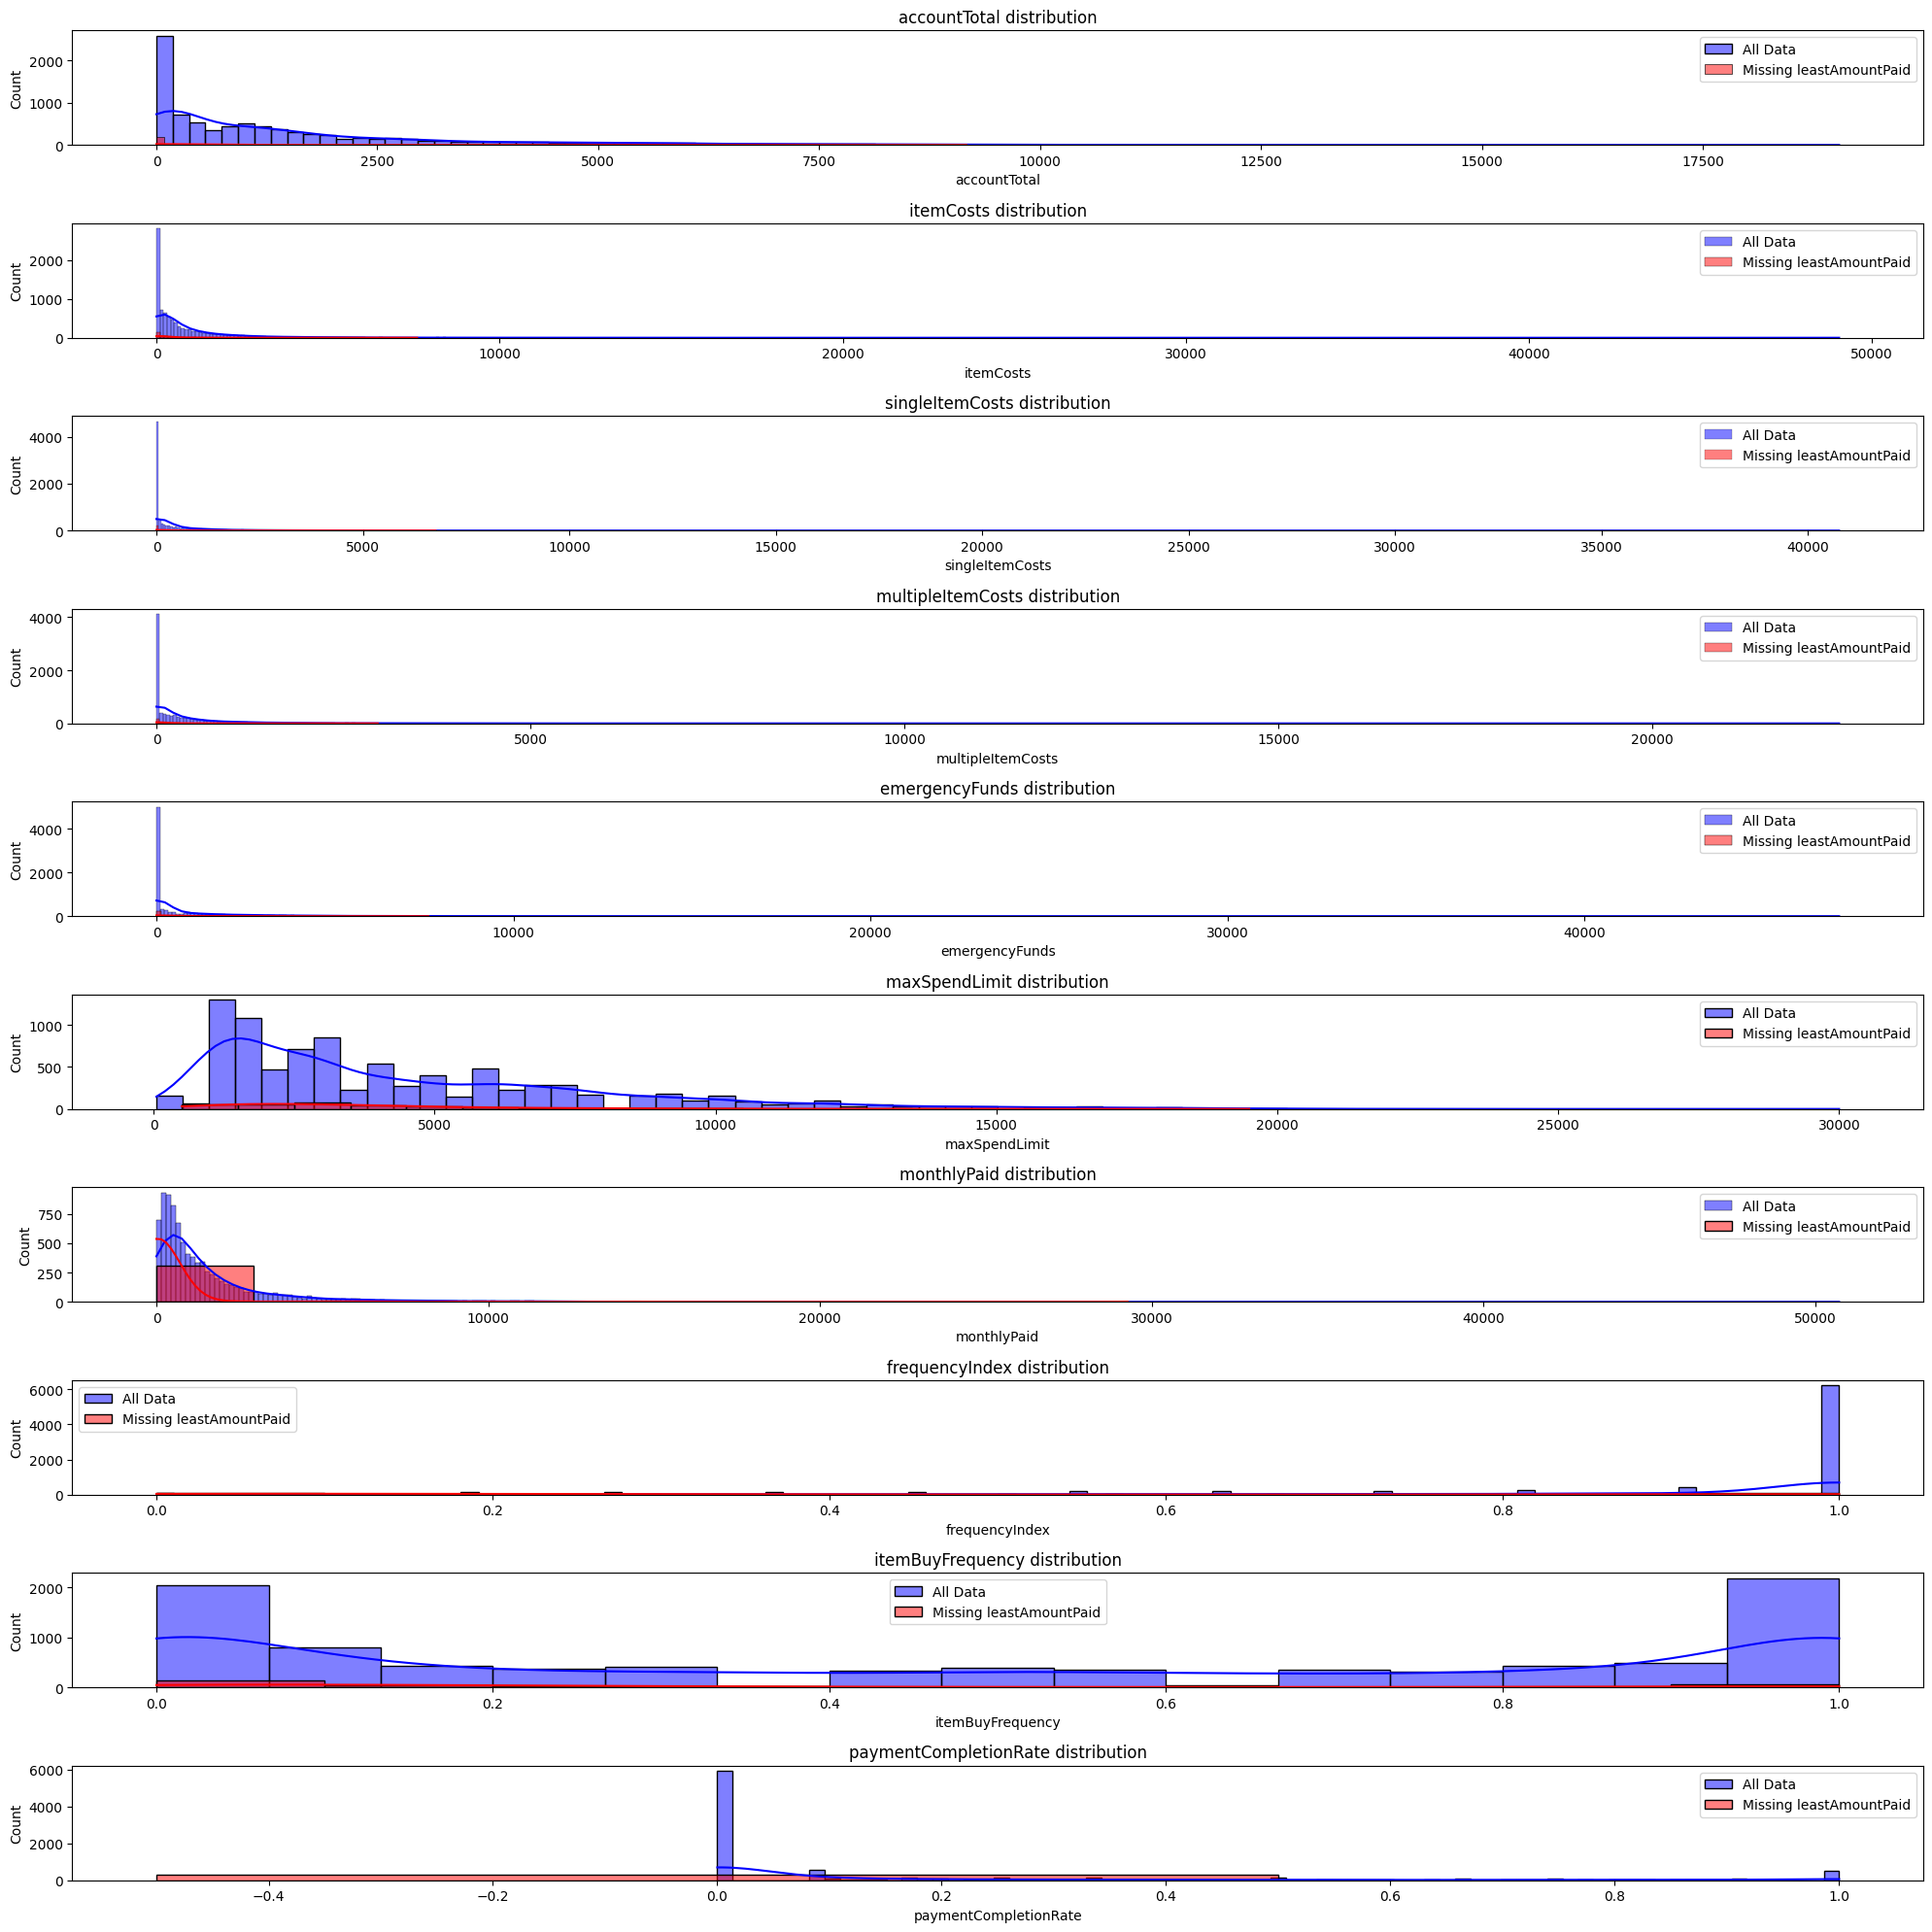

In [85]:
# Filter rows where "leastAmountPaid" is null
missing_leastAmountPaid_rows = shopeasy_df[shopeasy_df['leastAmountPaid'].isnull()]

# Select columns to create distribution plot
columns = ['accountTotal', 'itemCosts', 'singleItemCosts', 'multipleItemCosts',
           'emergencyFunds', 'maxSpendLimit', 'monthlyPaid', 'frequencyIndex',
           'itemBuyFrequency', 'paymentCompletionRate']

# Create a figure with subplots
fig, axes = plt.subplots(len(columns), 1, figsize=(20, 20))

# Plot distribution of each column for the entire dataset and for rows with missing 'leastAmountPaid'
for i, column in enumerate(columns):
    if column in shopeasy_df.select_dtypes(include=['int64', 'float64']).columns:
        sns.histplot(shopeasy_df[column], ax=axes[i], kde=True, color='blue', label='All Data')
        sns.histplot(missing_leastAmountPaid_rows[column], ax=axes[i], kde=True, color='red', label='Missing leastAmountPaid')
    else:
        sns.countplot(data=shopeasy_df, x=column, ax=axes[i], color='blue', label='All Data')
        sns.countplot(data=missing_leastAmountPaid_rows, x=column, ax=axes[i], color='red', label='Missing leastAmountPaid')
    axes[i].set_title(f'{column} distribution')
    axes[i].set_xlabel(column)
    axes[i].legend()

# Adjust spacing
plt.tight_layout()
plt.show()

## Impute the Data

In [86]:
# Calculate the proportion of missing data for each column
missing_data_proportion = shopeasy_df.isnull().mean() * 100

# Display the proportion of missing data
print("Proportion of Missing Data in Each Column (%):")
print(missing_data_proportion)

Proportion of Missing Data in Each Column (%):
accountTotal                0.000000
frequencyIndex              0.000000
itemCosts                   0.000000
singleItemCosts             0.000000
multipleItemCosts           0.000000
emergencyFunds              0.000000
itemBuyFrequency            0.000000
singleItemBuyFrequency      0.000000
multipleItemBuyFrequency    0.000000
emergencyUseFrequency       0.000000
emergencyCount              0.000000
itemCount                   0.000000
maxSpendLimit               0.011173
monthlyPaid                 0.000000
leastAmountPaid             3.497207
paymentCompletionRate       0.000000
accountLifespan             0.000000
location                    0.000000
accountType                 0.000000
webUsage                    0.000000
dtype: float64


The proportion of missing data in the leastAmountPaid column is approximately 3.50%.

Given that this is a relatively small proportion, we have two options:

1.	Imputation
2.	Dropping Data

Given the low proportion of missing data, imputation would be slightly more advantageous as it retains all records, ensuring the dataset remains comprehensive.

Median Imputation: Replaces missing values with the median of the column.

In [87]:
# Perform median imputation for the 'leastAmountPaid' column
shopeasy_df['leastAmountPaid'].fillna(shopeasy_df['leastAmountPaid'].median(), inplace=True)

# Verify that there are no missing values in 'leastAmountPaid'
missing_values_after_imputation_l = shopeasy_df['leastAmountPaid'].isnull().sum()
# Print the number of missing values after imputation
print(f"Number of Missing Values after Imputation: {missing_values_after_imputation_l}")

Number of Missing Values after Imputation: 0


## Investigate Missing Data in 'maxSpendLimit' column

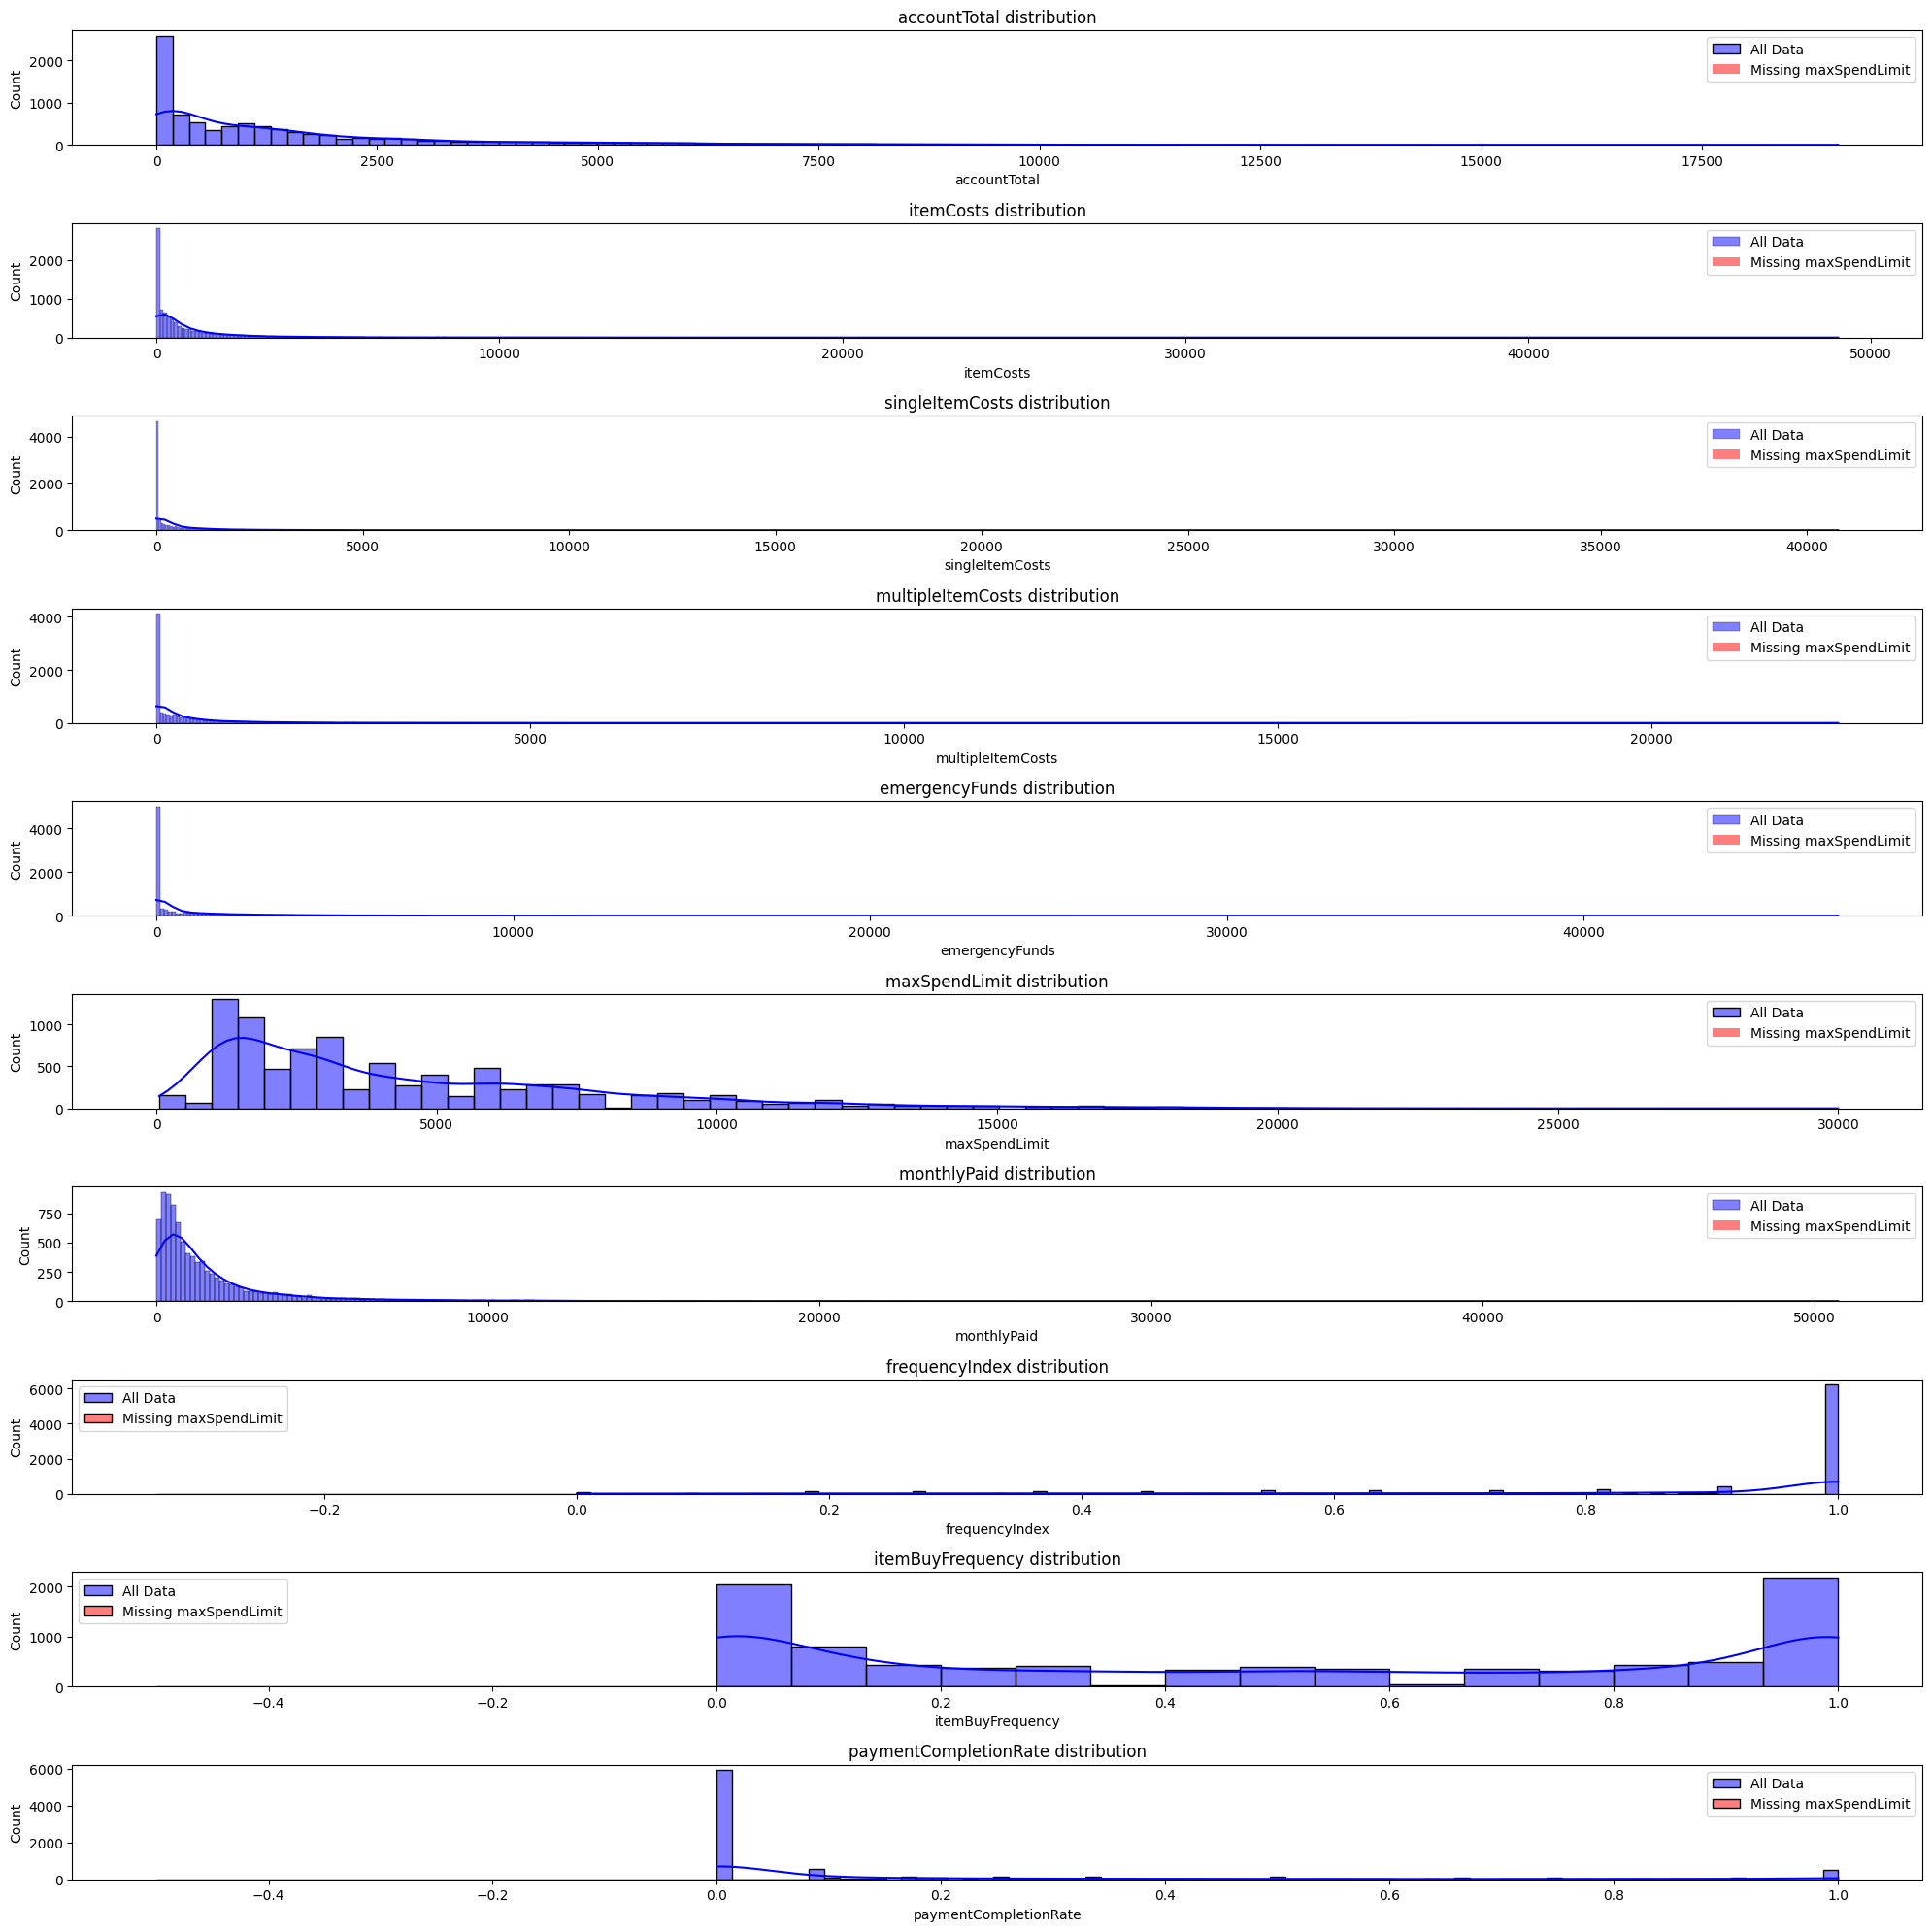

In [88]:
# Filter rows where "maxSpendLimit" is null
missing_maxSpendLimit_rows = shopeasy_df[shopeasy_df['maxSpendLimit'].isnull()]

# Select columns to create distribution plot
columns = ['accountTotal', 'itemCosts', 'singleItemCosts', 'multipleItemCosts',
           'emergencyFunds', 'maxSpendLimit', 'monthlyPaid', 'frequencyIndex',
           'itemBuyFrequency', 'paymentCompletionRate']

# Create a figure with subplots
fig, axes = plt.subplots(len(columns), 1, figsize=(20, 20))

# Plot distribution of each column for the entire dataset and for rows with missing 'leastAmountPaid'
for i, column in enumerate(columns):
    if column in shopeasy_df.select_dtypes(include=['int64', 'float64']).columns:
        sns.histplot(shopeasy_df[column], ax=axes[i], kde=True, color='blue', label='All Data')
        sns.histplot(missing_maxSpendLimit_rows[column], ax=axes[i], kde=True, color='red', label='Missing maxSpendLimit')
    else:
        sns.countplot(data=shopeasy_df, x=column, ax=axes[i], color='blue', label='All Data')
        sns.countplot(data=missing_maxSpendLimit_rows, x=column, ax=axes[i], color='red', label='Missing maxSpendLimit')
    axes[i].set_title(f'{column} distribution')
    axes[i].set_xlabel(column)
    axes[i].legend()

# Adjust spacing between subplots
plt.tight_layout()
plt.show()

## Impute the Data

There is only one missing value out of 8,950 entries. Dropping this row would result in a very small loss of data, but imputation ensures that we maintain every data point, preserving the full dataset.
The distribution plots indicate that the subset with the missing maxSpendLimit value is similar to the overall dataset across various features. This suggests that the missing value is likely missing at random (MAR), and imputation is appropriate.

In [89]:
from sklearn.impute import SimpleImputer

#impute missing 'maxSpendLimit' values using SimpleImputer
imputer = SimpleImputer(strategy='most_frequent')
shopeasy_df_imputed = shopeasy_df.copy()
shopeasy_df_imputed['maxSpendLimit'] = imputer.fit_transform(shopeasy_df_imputed[['maxSpendLimit']])

# Check the number of missing values after imputation
missing_values_after_imputation_m = shopeasy_df_imputed['maxSpendLimit'].isnull().sum()

# Print the number of missing values after imputation
print(f"Number of Missing Values after Imputation: {missing_values_after_imputation_m}")



Number of Missing Values after Imputation: 0


## 3. Visualizing Distribution

Use graphical methods to examine the spread of each variable in the dataset. Techniques such as histograms, kernel density estimations, and box plots are effective in uncovering the underlying distribution and central characteristics of the data.

For numerical values it is more useful to use histograms, while for categorical variables we may want to use bar plots

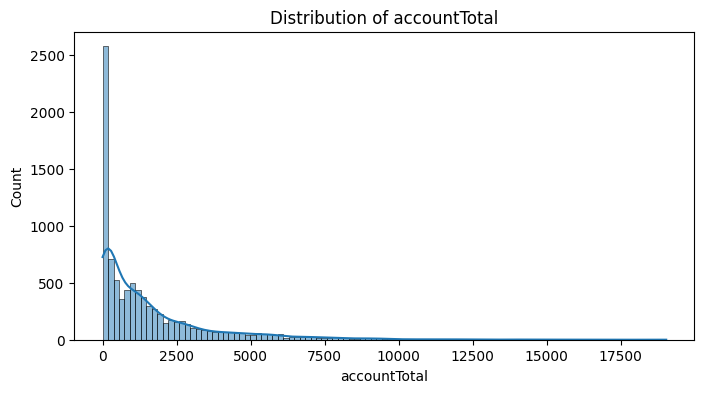

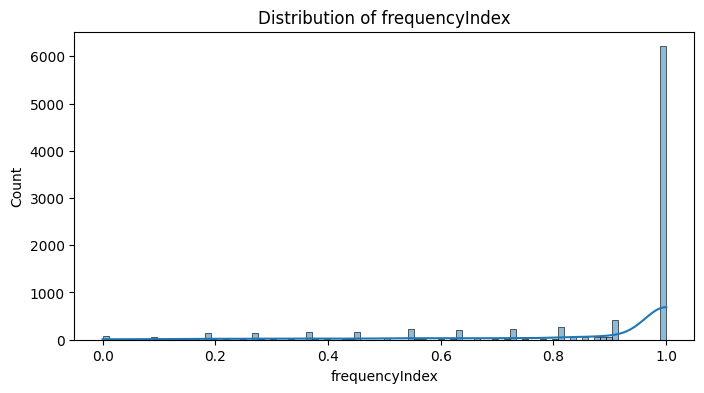

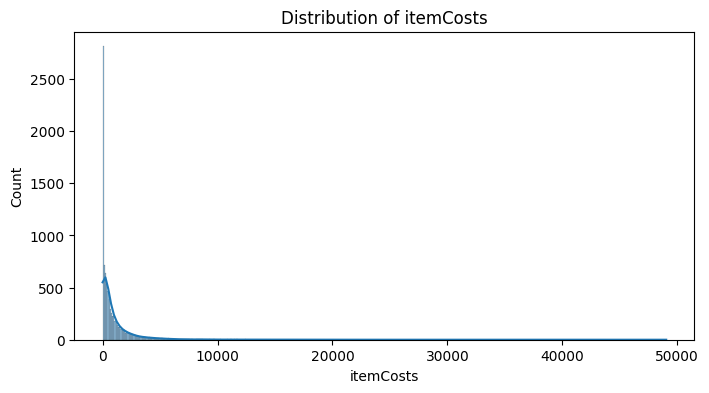

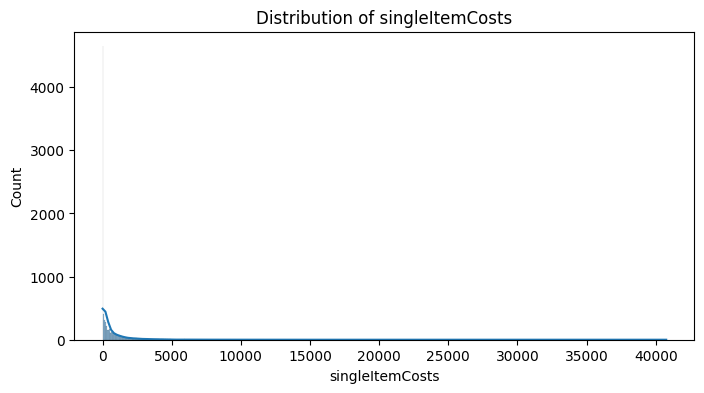

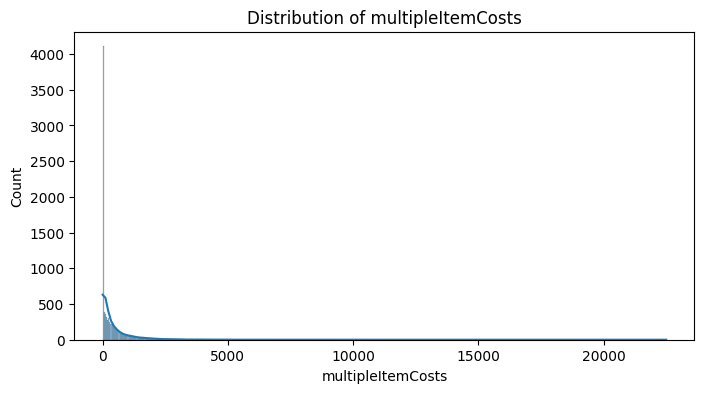

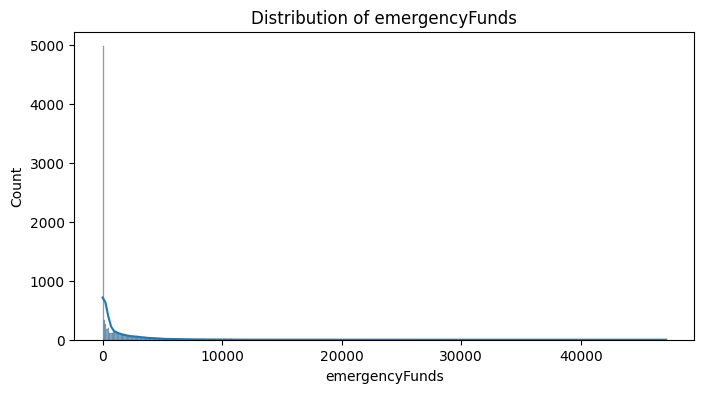

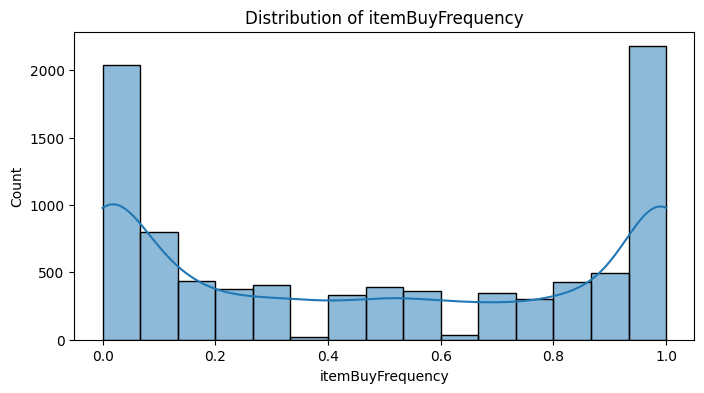

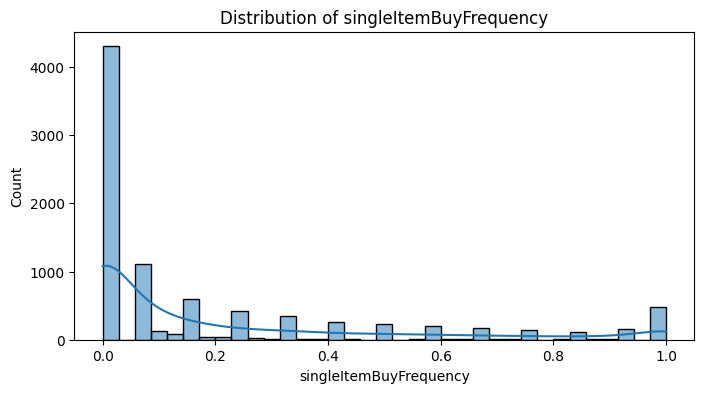

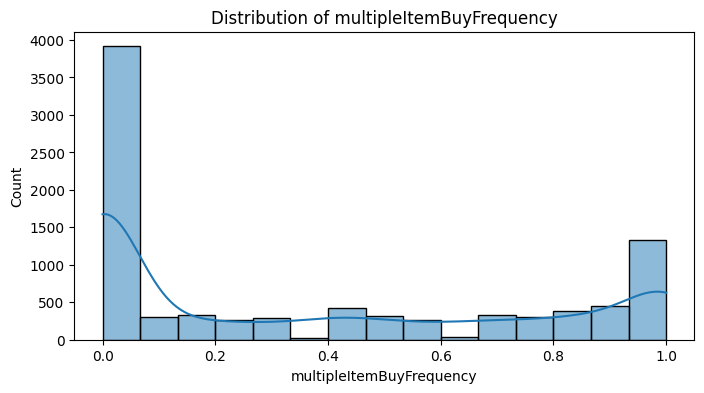

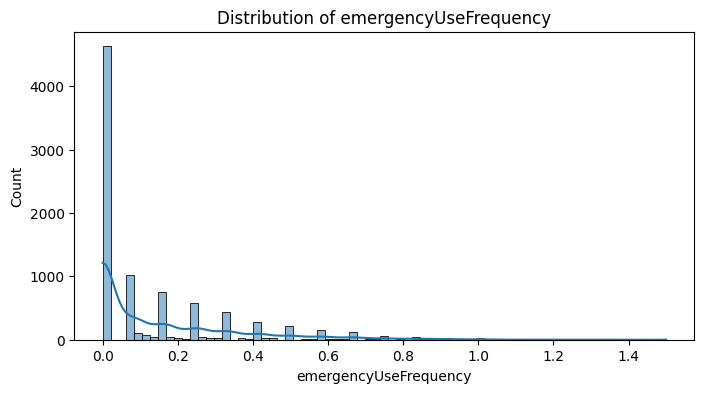

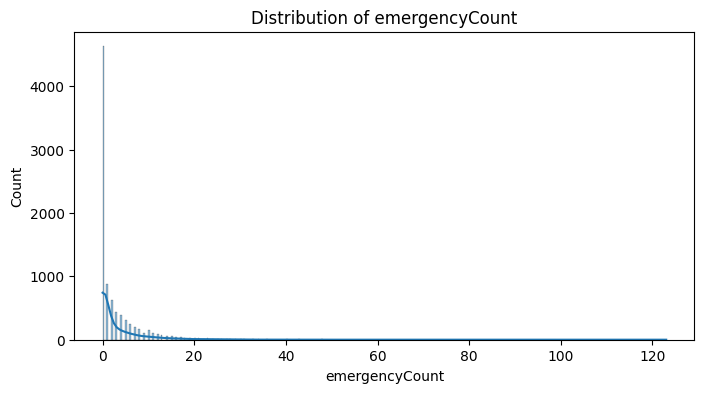

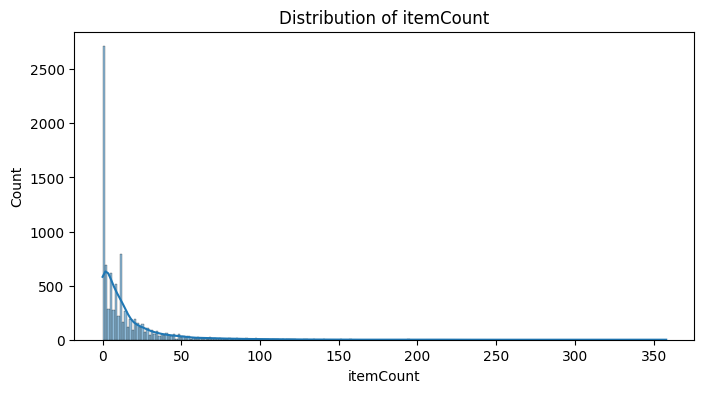

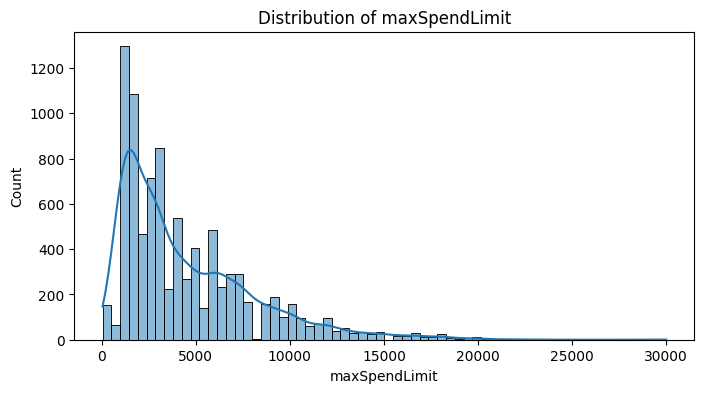

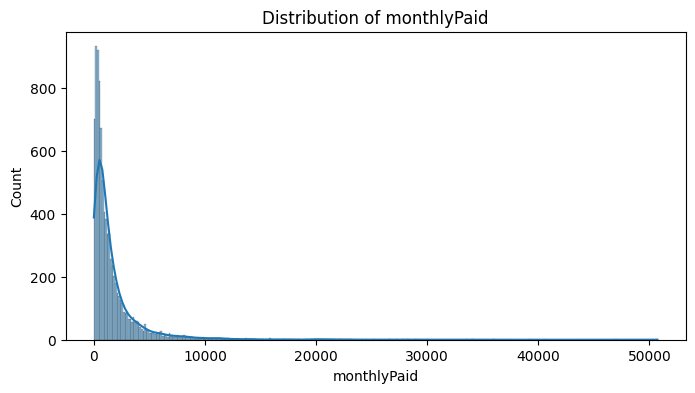

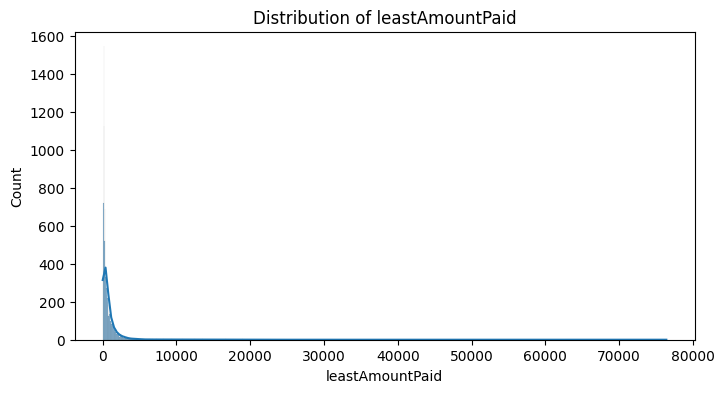

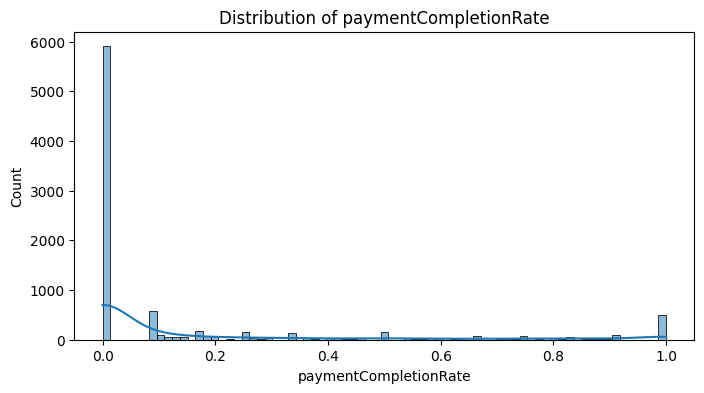

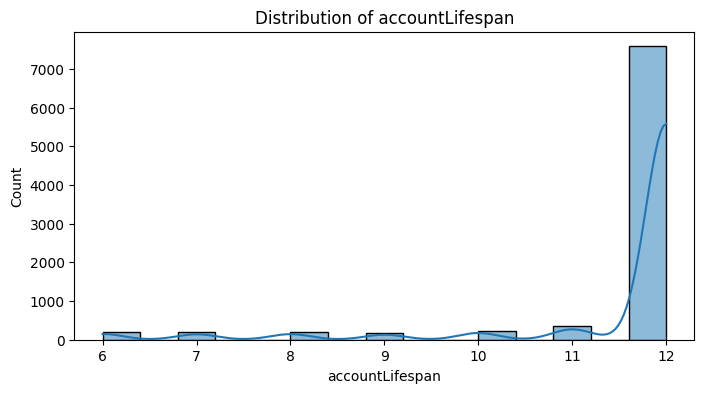

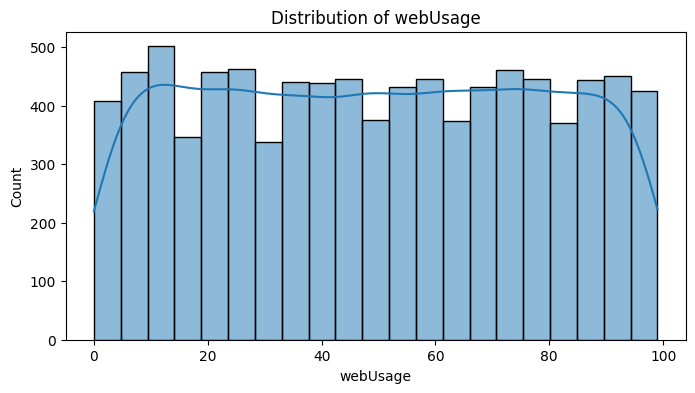

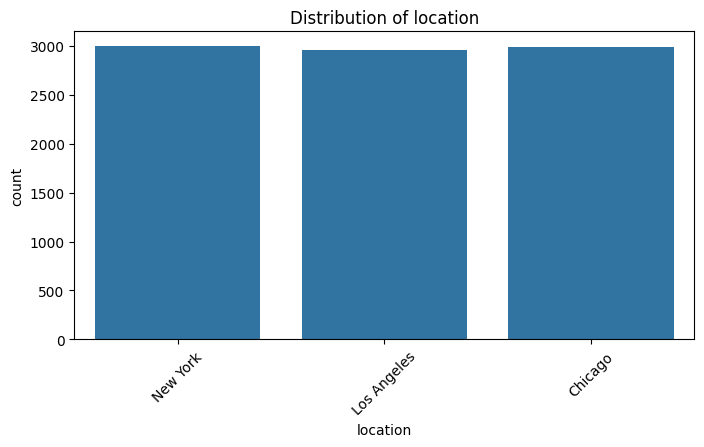

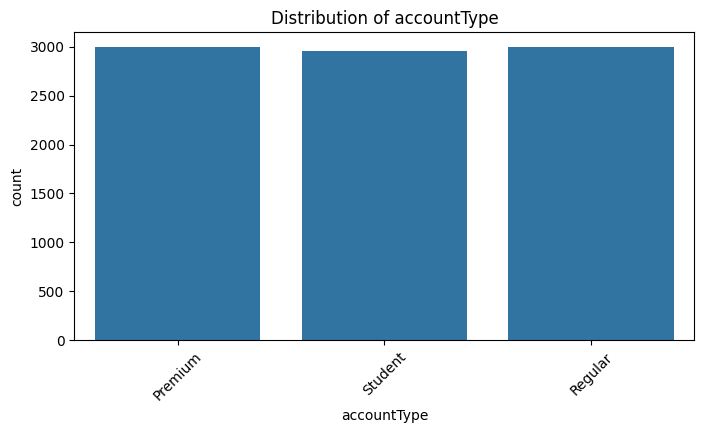

In [90]:
# Histogram for numerical variables
for column in shopeasy_df.select_dtypes(include='number').columns:
    plt.figure(figsize=(8, 4))
    sns.histplot(shopeasy_df[column], kde=True)
    plt.title(f'Distribution of {column}')
    plt.show()

# Bar plot for categorical variables
for column in shopeasy_df.select_dtypes(include='object').columns:
    plt.figure(figsize=(8, 4))
    sns.countplot(x=column, data=shopeasy_df)
    plt.title(f'Distribution of {column}')
    plt.xticks(rotation=45)
    plt.show()


We will now try to make box plots using FacetGrid

The **FacetGrid** in Seaborn allows you to create a grid of subplots based on one or more categorical variables. Each subplot represents a subset of your data, making it an excellent choice for visualizing relationships between multiple variables or factors.

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/axisgrid.py:718: UserWarning: Using the boxplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


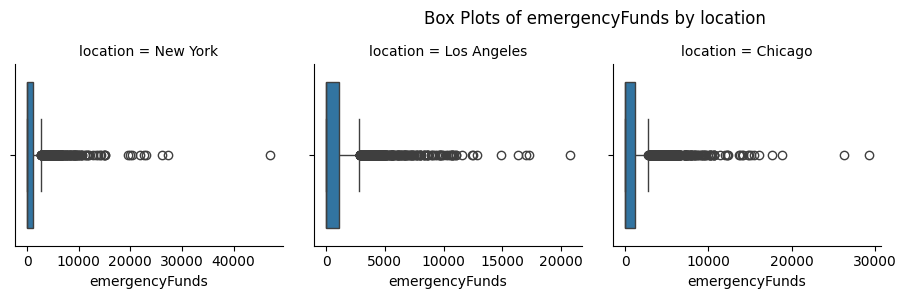

In [91]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

numerical_column = 'emergencyFunds'
categorical_column = 'location'

# Create a FacetGrid with box plots
g = sns.FacetGrid(shopeasy_df, col=categorical_column, col_wrap=4, sharex=False, sharey=False)
g.map(sns.boxplot, numerical_column)

# Adjust the layout and show the plots
plt.subplots_adjust(top=0.8)
g.fig.suptitle(f'Box Plots of {numerical_column} by {categorical_column}')
plt.show()


## 4 - Pair Plots for Relationships
Create pair plots to visualize relationships between pairs of variables.

This Pair Plot represents the first five numerical columns of our dataset. 

This visualization provides an overview of the relationships and distributions among these selected variables.

Each plot in the matrix represents the relationship between a pair of variables. The diagonal shows the distribution of each variable, typically visualized as a histogram or kernel density estimate. The off-diagonal plots are scatter plots representing the relationships between pairs of variables, which can help identify correlations, trends, and potential outliers.

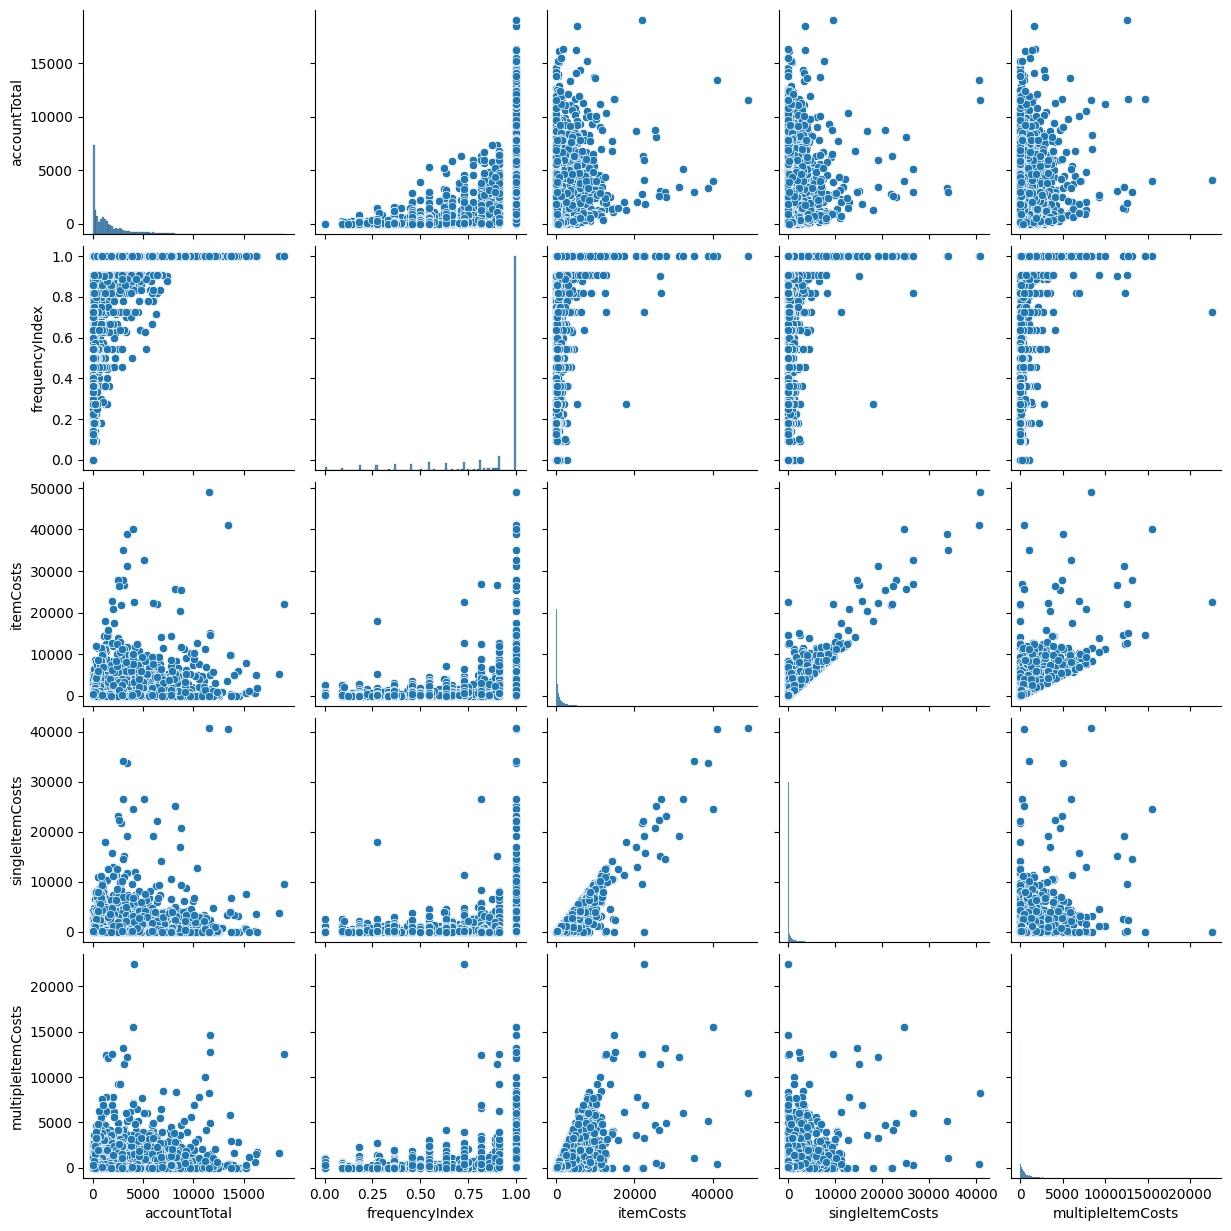

In [92]:
# For demonstration, let's select the first 5 numerical columns
numerical_columns = shopeasy_df.select_dtypes(include=['float64', 'int64']).columns
selected_columns = numerical_columns[:5]

# Creating pair plots for the selected columns
sns.pairplot(shopeasy_df[selected_columns])
plt.show()


There are many other ways to represent our dataset. For example we can find:

**Countplots**

Countplots in Seaborn are used to visualize the frequency of categorical data by displaying the number of occurrences of each category as bars in a bar chart. They are particularly useful for understanding the distribution of categorical variables and spotting any imbalances. Countplots can help identify the most common categories and detect rare or infrequent ones in a dataset.

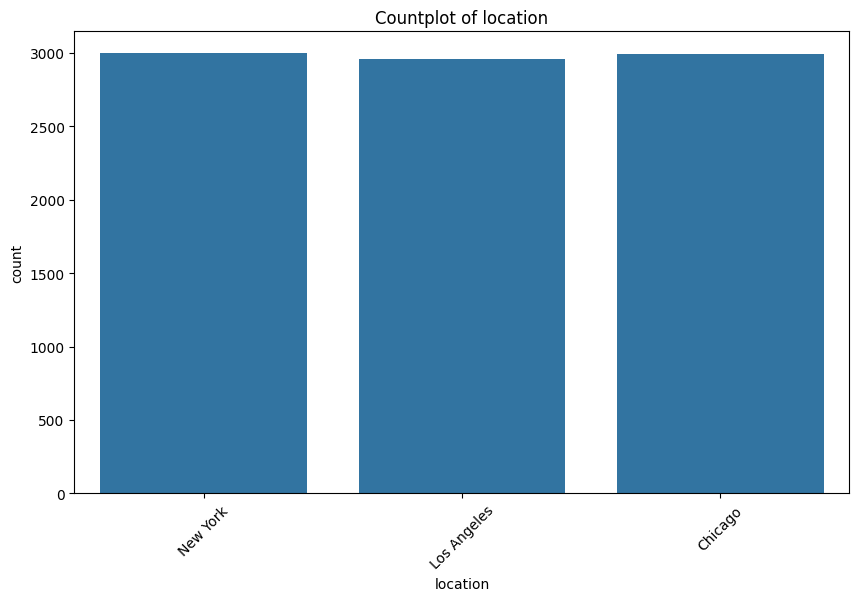

In [93]:
# Creating a countplot for a specific categorical column
categorical_column = 'location'  
plt.figure(figsize=(10, 6))
sns.countplot(x=categorical_column, data=shopeasy_df)
plt.title(f'Countplot of {categorical_column}')
plt.xticks(rotation=45)
plt.show()


**Heatmap**

A heatmap in Seaborn is a graphical representation of a 2D dataset where individual values are represented as colors in a grid. Heatmaps are particularly useful for visualizing relationships and patterns within complex datasets.

In a typical heatmap, the values of the dataset are mapped to a color scale, where higher values are represented by a different color than lower values. This allows you to quickly identify patterns, trends, and correlations within the data.

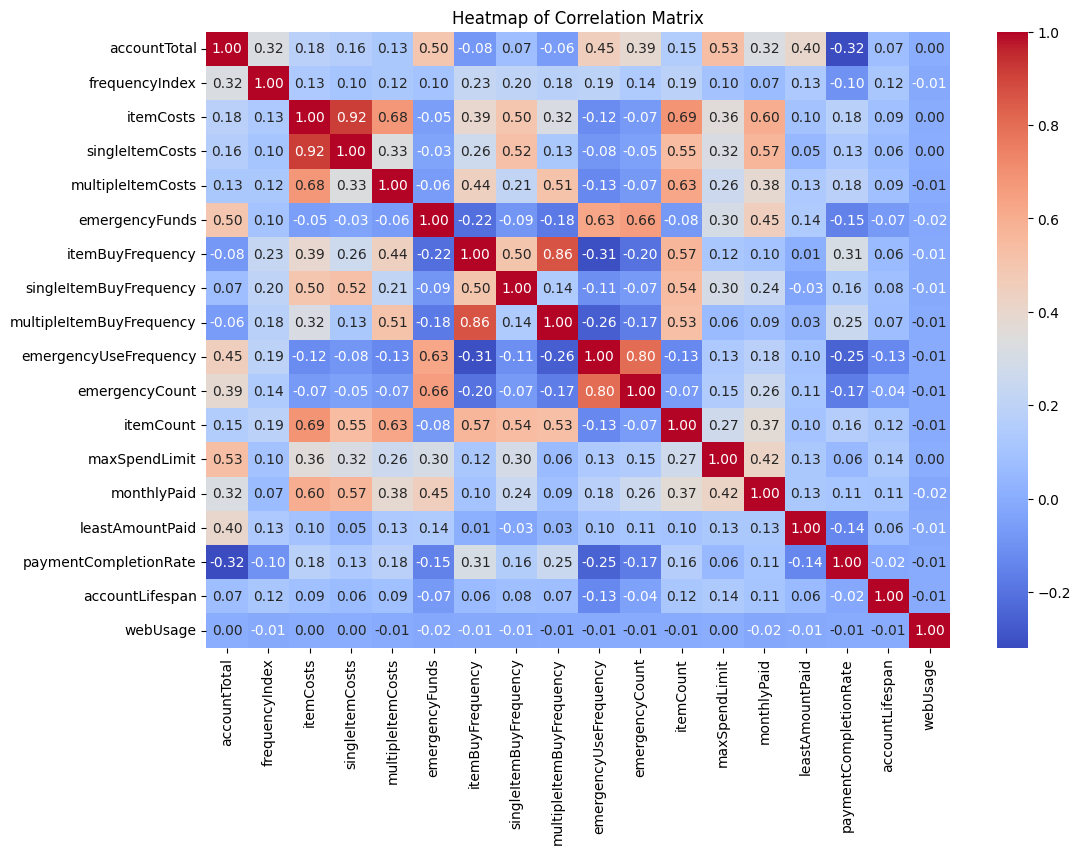

In [94]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


# Excluding non-numeric columns
numeric_df = shopeasy_df.select_dtypes(include=[np.number])

# Calculating the correlation matrix
correlation_matrix = numeric_df.corr()

# Creating a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Heatmap of Correlation Matrix')
plt.show()


**Histplot**
Histplot is a Seaborn function used for creating histograms, which provide a graphical representation of the distribution of a single numerical variable. It helps you understand the frequency or density of data points within specified bins or intervals.


Here there is an histogram for the 'accountTotal' column. 
This plot shows the distribution of values within this column, with the kernel density estimation (KDE) providing a smooth estimate of the distribution. The x-axis represents the 'accountTotal' values, and the y-axis shows their frequency.

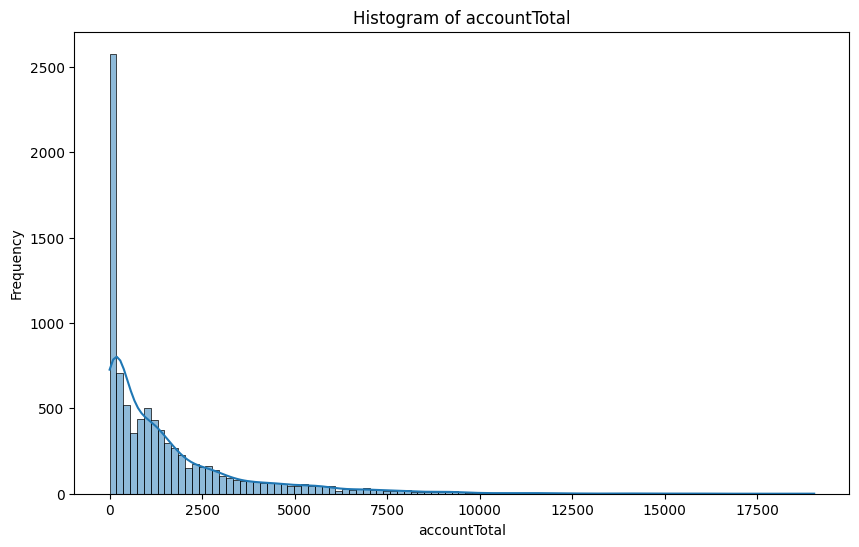

In [95]:
numerical_column = 'accountTotal'  

# Create a histogram
plt.figure(figsize=(10, 6))
sns.histplot(shopeasy_df[numerical_column], kde=True)
plt.title(f'Histogram of {numerical_column}')
plt.xlabel(numerical_column)
plt.ylabel('Frequency')
plt.show()

**Scatterplot**
A scatterplot in Seaborn is a graphical representation that displays individual data points as markers in a two-dimensional coordinate system. It is used to visualize the relationship between two numerical variables and assess their patterns and correlations.

Here's a scatter plot representing the relationship between 'accountTotal' and 'frequencyIndex' from the ShopEasy dataset. This plot can help visualize any potential correlation or pattern between the total amount spent by users and the frequency of their shopping activities. 

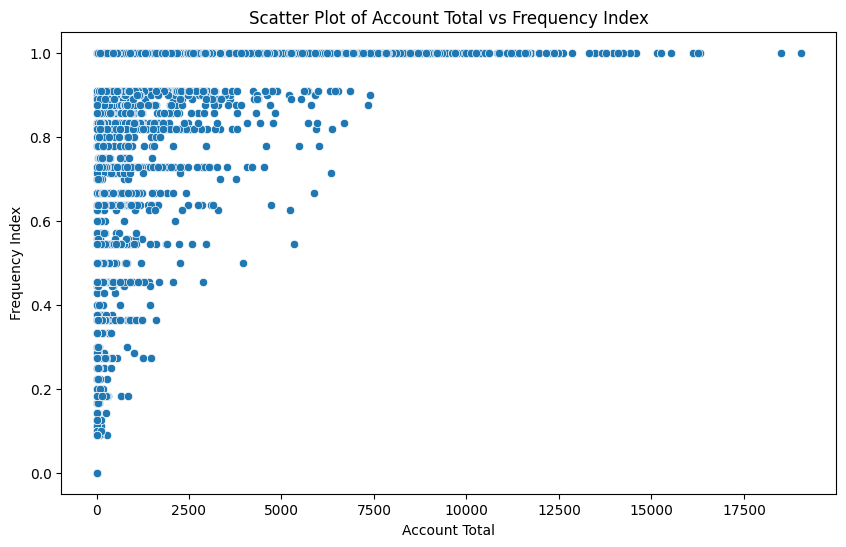

In [96]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='accountTotal', y='frequencyIndex', data=shopeasy_df)
plt.title('Scatter Plot of Account Total vs Frequency Index')
plt.xlabel('Account Total')
plt.ylabel('Frequency Index')
plt.show()


**Jointplot**
A jointplot in Seaborn is a versatile visualization that combines several graphical representations to help analyze the relationship between two numerical variables. It provides a comprehensive view of the data by including scatterplots, histograms, kernel density estimates (KDE), and correlation coefficients.

Here's a joint plot showing the relationship between 'accountTotal' and 'frequencyIndex' from the dataset. The scatter plot in the center illustrates the distribution of data points across these two variables, while the histograms on the top and right margins show the distribution of each variable separately. This visualization can help in understanding how these two aspects of customer behavior might be related.

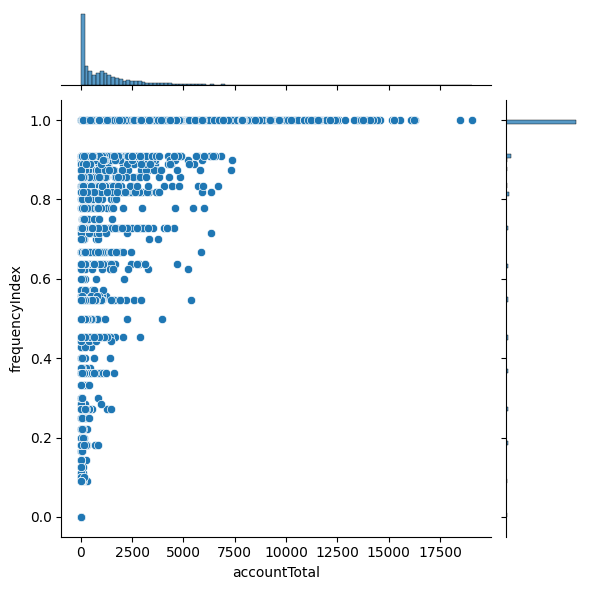

In [97]:
# For a jointplot, we need to select two numerical columns

# Creating a jointplot
sns.jointplot(x='accountTotal', y='frequencyIndex', data=shopeasy_df, kind='scatter')

# Display the plot
plt.show()


## **2 - Preprocess the dataset**
(Remove duplicates, encode categorical features with one hot encoding)

**Removing duplicates**

To remove duplicates, we identify which columns should be considered for determining duplicates. What we did, other than deleting duplicates, we also created a new csv file in the same directory as the original file containing the data with duplicates removed. 

In [98]:
# Remove duplicates
shopeasy_df_no_duplicates = shopeasy_df.drop_duplicates()

# Save the dataframe without duplicates
output_file_path = 'shopEasy_no_duplicates.csv'
shopeasy_df_no_duplicates.to_csv(output_file_path, index=False)

print(f"File saved without duplicates at: {output_file_path}")


File saved without duplicates at: shopEasy_no_duplicates.csv


We actually want to know if there are duplicates. Our output shows that there are no duplicates in our dataset

In [99]:
# Finding duplicate rows in the dataframe
duplicates = shopeasy_df[shopeasy_df.duplicated(keep=False)]

# Displaying the duplicate rows, if any
duplicates


,accountTotal,frequencyIndex,itemCosts,singleItemCosts,multipleItemCosts,emergencyFunds,itemBuyFrequency,singleItemBuyFrequency,multipleItemBuyFrequency,emergencyUseFrequency,emergencyCount,itemCount,maxSpendLimit,monthlyPaid,leastAmountPaid,paymentCompletionRate,accountLifespan,location,accountType,webUsage


**Encoding categorical features with one hot encoding**

For machine learning algorithms to process categorical data like text or names of countries, these features must be converted into numeric forms. Scikit-learn offers various encoders for this purpose, including the OneHotEncoder, which is specifically designed to handle categorical features. This involves creating a new binary variable for each category.

In our case the categorical variables are: location and accountType

We now do it for location

In [100]:
print("Before")
print(shopeasy_df['location'][:5])
# One Hot Encoder
encoder = OneHotEncoder()
col_out = encoder.fit_transform(shopeasy_df[['location']])

print("After")
print(col_out[:5])


Before
0       New York
1    Los Angeles
2       New York
3        Chicago
4       New York
Name: location, dtype: object
After
  (0, 2)	1.0
  (1, 1)	1.0
  (2, 2)	1.0
  (3, 0)	1.0
  (4, 2)	1.0


And then for accountType

In [101]:
print("Before")
print(shopeasy_df['accountType'][:5])
# One Hot Encoder
encoder = OneHotEncoder()
col_out = encoder.fit_transform(shopeasy_df[['accountType']])

print("After")
print(col_out[:5])

Before
0    Premium
1    Premium
2    Student
3    Premium
4    Premium
Name: accountType, dtype: object
After
  (0, 0)	1.0
  (1, 0)	1.0
  (2, 2)	1.0
  (3, 0)	1.0
  (4, 0)	1.0


## 3 - Define whether this is a regression, classification or clustering problem
Explain why and choose your model design accordingly. Test at least 2 different models.

Choosing whether this is a regression, classification or clustering problem depends on what we want to analyze. 

Saying that it is a Regression problem would mean to predict a continuos variable, like for instance predicting 'accountTotal' or 'itemCosts'. Regression is in fact commonly used when the output variable is a real or a continous value

Otherwise if the objective is to predict a categorical variable, like predicting 'accountType' or classifying customers based on their 'location', then it may is a Classification problem.

What we think it's more appropriate is to treat it as a Clustering problem. As a matter of fact we use clustering to group the data into clusters based on similarities among the features without any predefined labels. Clustering is a type of unsupervised learning used when the output is not known and the model tries to identify patterns in the data on its own

We will now implement three different clustering algorithms: KMeans, hierarchical clustering and DBSCAN.

## KMeans

We started with the implementation of kmeans using the elbow method to find out the optimal number of clusters .
From the output we saw that the elbow point is at 4. 

In [102]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
import matplotlib.pyplot as plt


# Identify numerical columns for clustering
numerical_cols = shopeasy_df.select_dtypes(include=['int64', 'float64']).columns

# Preprocessing: Handling missing values and scaling features
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

# Applying preprocessing
preprocessor = ColumnTransformer(transformers=[
    ('num', numerical_transformer, numerical_cols)
])

# Preprocess the data
X = preprocessor.fit_transform(shopeasy_df[numerical_cols])


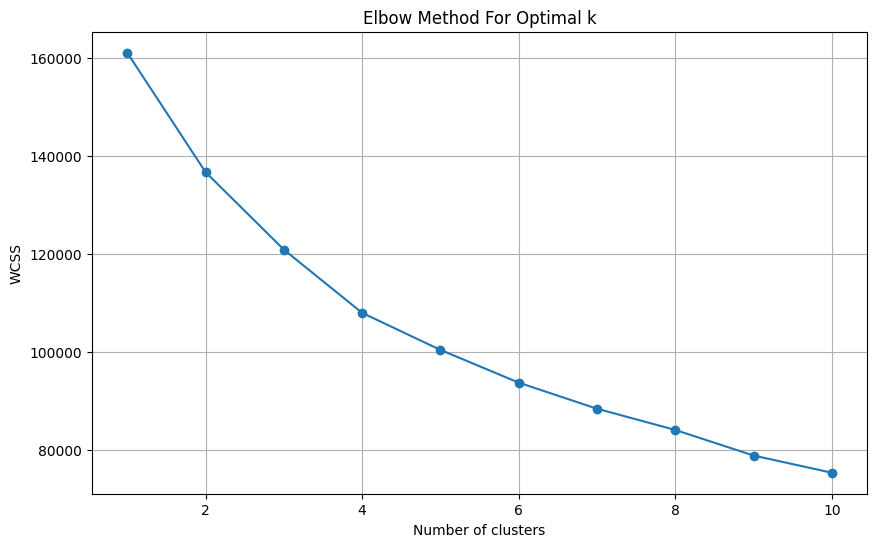

In [103]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Apply the Elbow Method to find the optimal number of clusters
# We will calculate the Within-Cluster Sum of Squares (WCSS) for a range of cluster numbers
wcss = []
for i in range(1, 11):  # Trying from 1 to 10 clusters
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

# Plotting the results onto a line graph to observe the 'elbow'
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method For Optimal k')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')  
plt.grid(True)
plt.show()


We now proceed with testing the KMeans algorithm with 4 clusters

There are four distinct clusters represented by different colors. The black dots represent the centroids of each cluster, which are the average positions of all the points in each cluster. 

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


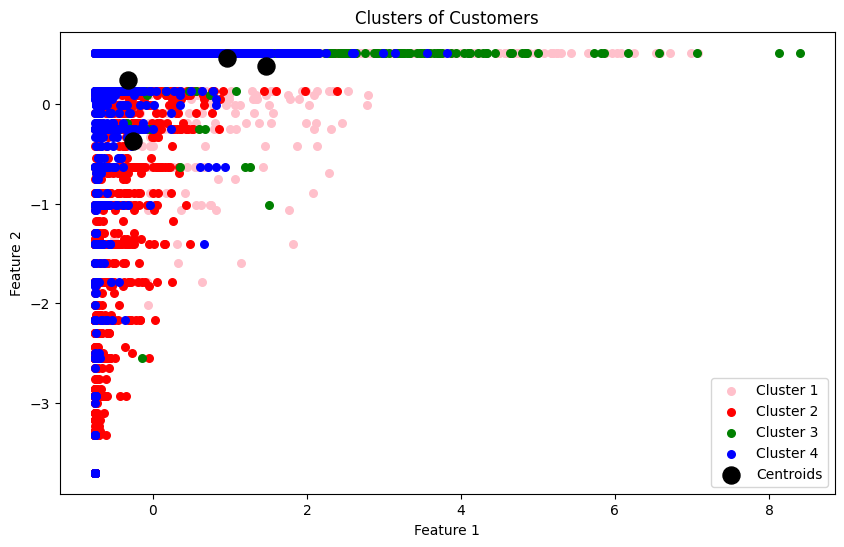

In [104]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# X is the preprocessed dataset
kmeans = KMeans(n_clusters=4, init='k-means++', random_state=42)
km_clusters = kmeans.fit_predict(X)

# We use the first two features for vuìisualization.
feature_1 = X[:, 0]
feature_2 = X[:, 1]

# Visualize the clusters
plt.figure(figsize=(10, 6))
colors = ['pink', 'red', 'green', 'blue']
labels = ['Cluster 1', 'Cluster 2', 'Cluster 3', 'Cluster 4']

for i, color, label in zip(range(4), colors, labels):
    plt.scatter(feature_1[km_clusters == i], feature_2[km_clusters == i], s=30, c=color, label=label)

# Plot centroids
centroids = kmeans.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1], s=150, c='black', label='Centroids')

plt.title('Clusters of Customers')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()


To better understand our models and confront it we will compute two evaluation metrics 
- Silhouette coefficient
- Calinski-Harabasz index
- Davies Bouldin index

In [105]:
from sklearn.metrics import silhouette_score
from sklearn.metrics import calinski_harabasz_score
from sklearn.metrics import davies_bouldin_score

In [106]:
silhouette_avg = silhouette_score(X, kmeans.labels_)
calinski_score = calinski_harabasz_score(X, kmeans.labels_)
davies_bouldin_score= davies_bouldin_score(X, kmeans.labels_)
print('Silhouette Index: %.3f' % silhouette_avg)
print('Calinski-Harabasz Index: %.3f' % calinski_score)
print('Davies Bouldin Index: %.3f' % davies_bouldin_score)

Silhouette Index: 0.176
Calinski-Harabasz Index: 1465.761
Davies Bouldin Index: 1.680


## Hierarchical Clustering ##

As we did before, also for the hierarchical clustering, we need to find the optimal number of clusters. To do so we plotted a dendogram and from the output we can see that the optimal number of clusters is 4 because it preserves the significant jump in the hierarchy. This suggests a large jump in dissimilarity.

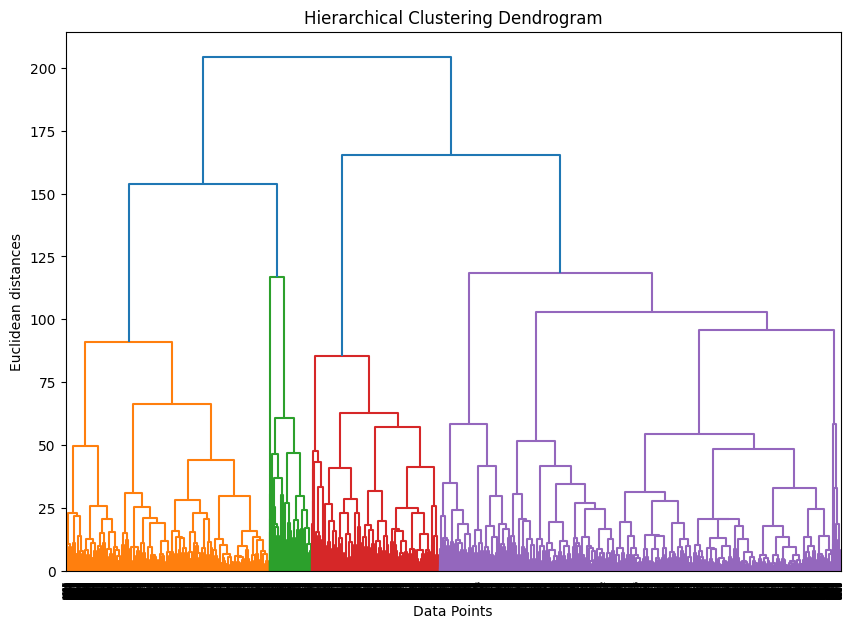

In [107]:
import pandas as pd
import matplotlib.pyplot as plt
import scipy.cluster.hierarchy as sch
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering


# Selecting a subset of numerical columns for clustering
numerical_cols = shopeasy_df.select_dtypes(include=['int64', 'float64']).columns
data_subset = shopeasy_df[numerical_cols].dropna()

# Scale the data
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_subset)

# Create a dendrogram
plt.figure(figsize=(10, 7))
plt.title("Hierarchical Clustering Dendrogram")
dendrogram = sch.dendrogram(sch.linkage(data_scaled, method='ward'))
plt.xlabel("Data Points")
plt.ylabel("Euclidean distances")
plt.show()


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_agglomerative.py:1006: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


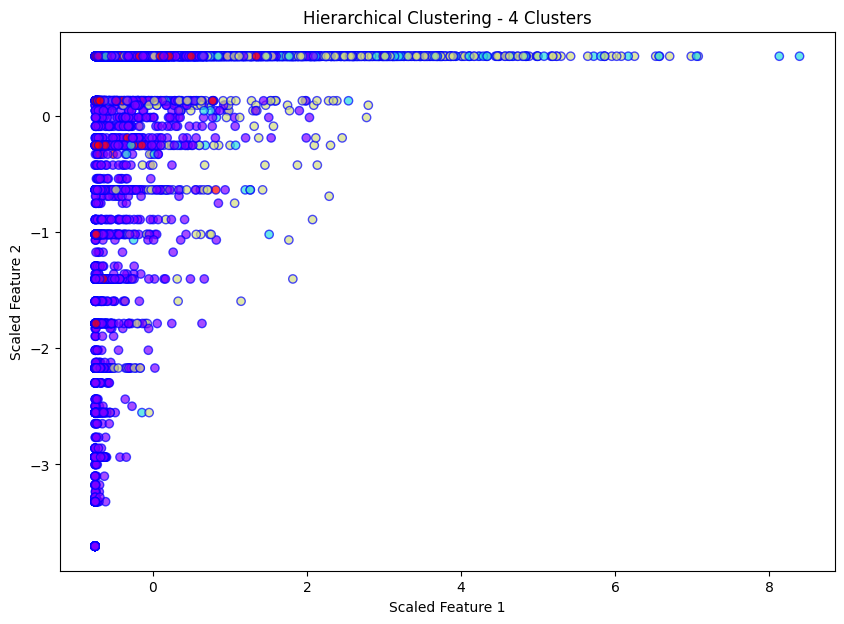

In [108]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering


# Preprocess the data: Select numerical columns and scale the data
numerical_cols = shopeasy_df.select_dtypes(include=['int64', 'float64']).columns
data_subset = shopeasy_df[numerical_cols].dropna()

# Scaling the data
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_subset)

# Hierarchical Clustering: Perform the clustering with 4 clusters on scaled data
hc = AgglomerativeClustering(n_clusters=4, affinity='euclidean', linkage='ward')
hc_clusters = hc.fit_predict(data_scaled)

# Visualize the clusters
plt.figure(figsize=(10, 7))
plt.scatter(data_scaled[:, 0], data_scaled[:, 1], c=hc_clusters, cmap='rainbow', alpha=0.7, edgecolors='b')
plt.title('Hierarchical Clustering - 4 Clusters')
plt.xlabel('Scaled Feature 1')
plt.ylabel('Scaled Feature 2')
plt.show()



We now compute the same 3 evaluation metrics

In [109]:
from sklearn.metrics import silhouette_score
from sklearn.metrics import calinski_harabasz_score
from sklearn.metrics import davies_bouldin_score

In [110]:
# Silhouette Coefficient
silhouette_avg = silhouette_score(data_scaled, hc_clusters)

# Calinski-Harabasz Index
calinski_harabasz_avg = calinski_harabasz_score(data_scaled, hc_clusters)

# Davies-Bouldin Index
davies_bouldin_avg = davies_bouldin_score (data_scaled, hc_clusters)

print('Silhouette Index: %.3f' % silhouette_avg)
print('Calinski-Harabasz Index: %.3f' % calinski_harabasz_avg)
print('Davies Bouldin Index: %.3f' % davies_bouldin_avg)


Silhouette Index: 0.134
Calinski-Harabasz Index: 1206.165
Davies Bouldin Index: 1.854


## DBSCAN ##

In this case DBSCAN won't need any help to figure out the optimal number of clusters. This is the ideal method if you want to deal with outliners an non-linearity. 

DBSCAN operates on the principle that a cluster comprises a minimum number of points that are densely packed together. The functionality of this model is governed by two key parameters:

- Epsilon: This parameter sets the maximum distance between two points for them to be considered as part of the same neighborhood.
- Minimum Samples: This defines the minimum number of close neighbors that a point must have to qualify as a core point, with the point itself being counted within this minimum number.

Minimum sample (n): 36


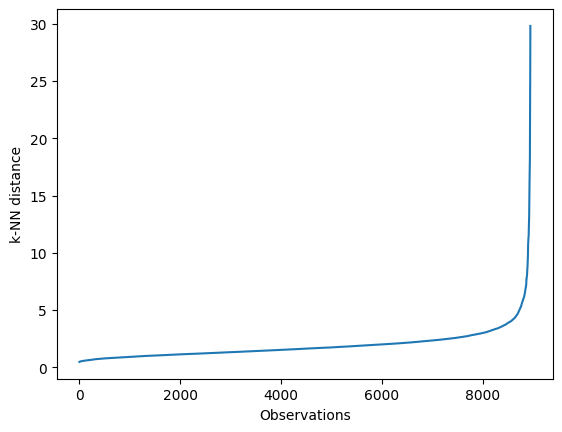

In [111]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import NearestNeighbors
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt


# Impute missing values for numerical data
numeric_data = shopeasy_df.select_dtypes(include=[np.number])
imputer = SimpleImputer(strategy='mean')
numeric_data_imputed = imputer.fit_transform(numeric_data)

# Standardize the data
scaler = StandardScaler()
data_std = scaler.fit_transform(numeric_data_imputed)
data_std_df = pd.DataFrame(data_std, columns=numeric_data.columns)

# Finding 'n' (Minimum Sample Size)
min_sample = 2 * len(data_std_df.columns)
print(f"Minimum sample (n): {min_sample}")

# Finding Epsilon and k Neighbors
nbrs = NearestNeighbors(n_neighbors=min_sample + 1).fit(data_std_df)
neigh_dist, neigh_ind = nbrs.kneighbors(data_std_df)

# Sorting and Plotting for Epsilon Determination
sort_neigh_dist = np.sort(neigh_dist, axis=0)
k_dist = sort_neigh_dist[:, min_sample]
plt.plot(k_dist)
plt.ylabel("k-NN distance")
plt.xlabel("Observations")
plt.show()


Also in this case we fit the model.

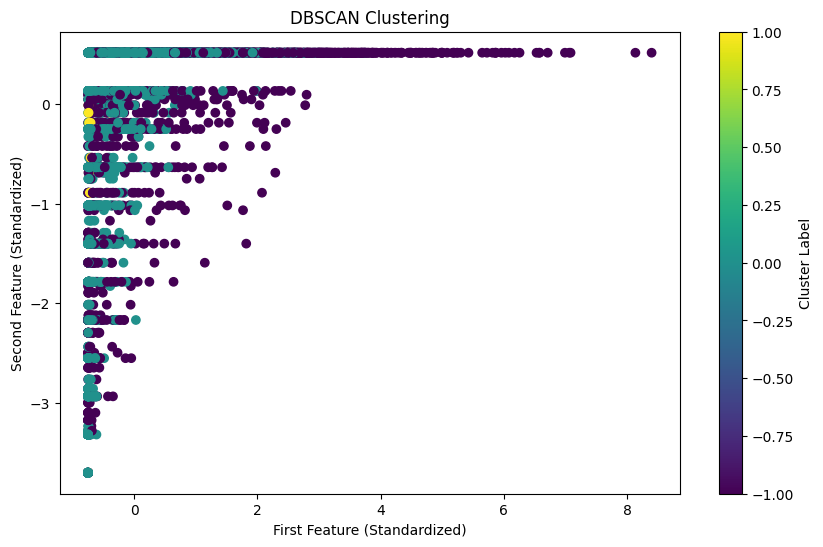

In [112]:
from sklearn.cluster import DBSCAN

# Assuming the previously calculated epsilon and minimum samples
epsilon = np.median(k_dist)  
min_samples = min_sample  

# Creating the DBSCAN model
dbscan = DBSCAN(eps=epsilon, min_samples=min_samples)
clusters = dbscan.fit_predict(data_std_df)

#plot the graph
plt.figure(figsize=(10, 6))
plt.scatter(data_std_df.iloc[:, 0], data_std_df.iloc[:, 1], c=clusters, cmap='viridis', marker='o')
plt.title('DBSCAN Clustering')
plt.xlabel('First Feature (Standardized)')
plt.ylabel('Second Feature (Standardized)')
plt.colorbar(label='Cluster Label')
plt.show()

Lastly we compute the evaluation metrics

In [113]:
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score

# Calculating the Silhouette coefficient
filtered_labels = clusters[clusters != -1]
filtered_data = data_std_df.iloc[clusters != -1, :]

# Computing the Silhouette coefficient, Calinski-Harabasz index, and Davies-Bouldin index
if len(set(filtered_labels)) > 1:
    silhouette_coef = silhouette_score(filtered_data, filtered_labels)
    calinski_harabasz = calinski_harabasz_score(filtered_data, filtered_labels)
    davies_bouldin = davies_bouldin_score(filtered_data, filtered_labels)
else:
    silhouette_coef = "Undefined - Only one cluster present"
    calinski_harabasz = "Undefined - Only one cluster present"
    davies_bouldin = "Undefined - Only one cluster present"


print('Silhouette Index: %.3f' % silhouette_coef)
print('Calinski-Harabasz Index: %.3f' % calinski_harabasz)
print('Devis Bouldin Index: %.3f' % davies_bouldin)



Silhouette Index: 0.251
Calinski-Harabasz Index: 97.671
Devis Bouldin Index: 0.958


Comparing the previous values with this one, we can say that:
- Silhouette Index: DBSCAN has the highest Silhouette Index (0.251), suggesting that it has the best-defined clusters compared to the other models.
- Calinski-Harabasz Index: K-means has the highest score (1485.760), indicating better cluster separation compared to the other models.
- Davies-Bouldin Index: DBSCAN has the lowest score (0.959), implying the best clustering in terms of separation and compactness.

We then can say that DBSCAN seems preferable. 

## 4 - Identify the proper number of segments, and evaluate different options

The segmentation strategies may focus on factors like spending habits, frequency of purchases, types of purchases and geographical location.

Let's first perform segmentation based on spending habits. We choose all the features related to the spending habits.

In [159]:

# Select columns related to spending habits and fill missing values
spending_data = shopeasy_df[['accountTotal', 'itemCosts', 'singleItemCosts', 'multipleItemCosts', 'maxSpendLimit']].fillna(0)

# Perform K-means clustering with 4 clusters
kmeans = KMeans(n_clusters=4, init='k-means++', random_state=42)
cluster_labels = kmeans.fit_predict(spending_data)

# Add cluster labels to the original dataframe
data_with_clusters = shopeasy_df.copy()
data_with_clusters['SpendingHabitCluster'] = cluster_labels

# Function to summarize each cluster for numeric columns
def summarize_clusters(data_frame, cluster_column):
    numeric_cols = data_frame.select_dtypes(include=[float, int]).columns
    cluster_summary = data_frame[numeric_cols].groupby(cluster_column).mean()
    cluster_summary['Count'] = data_frame[cluster_column].value_counts()
    return cluster_summary

# Summarizing the clusters
cluster_summary = summarize_clusters(data_with_clusters, 'SpendingHabitCluster')
cluster_summary


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


,accountTotal,frequencyIndex,itemCosts,singleItemCosts,multipleItemCosts,emergencyFunds,itemBuyFrequency,singleItemBuyFrequency,multipleItemBuyFrequency,emergencyUseFrequency,...,leastAmountPaid,paymentCompletionRate,accountLifespan,webUsage,cluster,cluster_spending_habits_filled,cluster_spending_habits,Cluster,Geo_Cluster,Count
SpendingHabitCluster,,,,,,,,,,,,,,,,,,,,,
0,802.462966,0.849452,517.241203,253.195769,264.338905,526.662992,0.449089,0.129826,0.345788,0.112272,...,613.535491,0.147756,11.378472,49.304956,0.000000,0.404792,-0.028680,-0.002178,-0.007261,5509
1,2026.326768,0.913214,1334.279531,822.118464,512.532217,1350.265997,0.543416,0.298525,0.379629,0.155352,...,911.223694,0.169536,11.725691,49.768067,0.000000,-0.564510,-0.171774,-0.004162,-0.071131,2643
2,5292.416317,0.950384,2504.030866,1576.809625,927.336163,2930.806801,0.590493,0.372395,0.435005,0.231941,...,2189.906025,0.131555,11.781654,49.087855,-0.021964,-0.705426,-0.638243,-0.002584,-0.339793,774
3,5390.389571,0.946591,27690.865833,21422.884583,6267.981250,929.689201,0.888194,0.814583,0.696528,0.038194,...,3274.877294,0.493845,11.916667,49.166667,-1.000000,-1.000000,-1.000000,0.000000,-1.000000,24


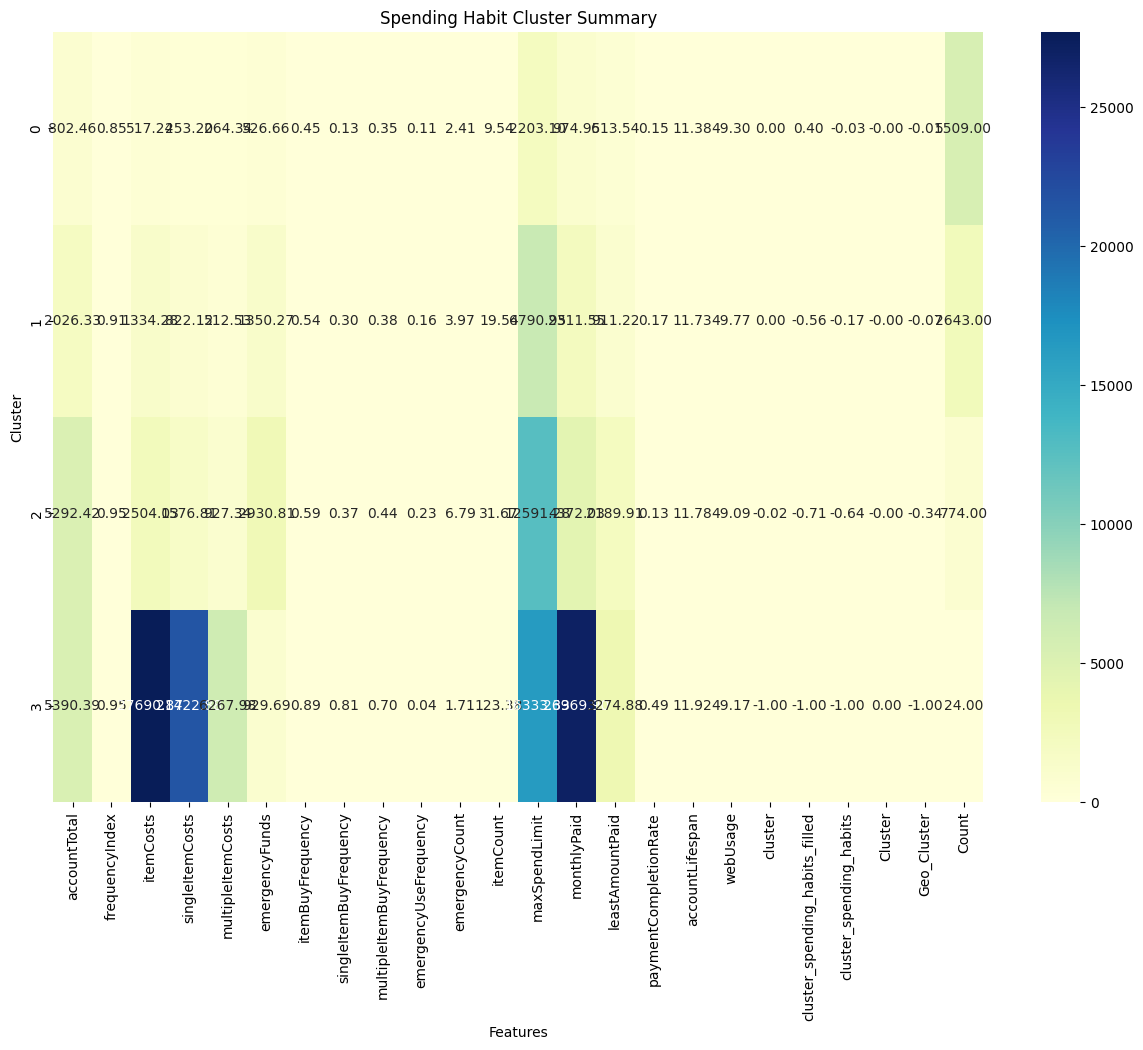

In [160]:
plt.figure(figsize=(15, 10))
sns.heatmap(cluster_summary, annot=True, fmt=".2f", cmap="YlGnBu")
plt.title('Spending Habit Cluster Summary')
plt.ylabel('Cluster')
plt.xlabel('Features')
plt.show()

We now perform segmentation by purchase frequency

In [161]:
# Relevant columns for segmentation by purchase frequency
purchase_frequency_data = shopeasy_df[['frequencyIndex', 'itemBuyFrequency', 'singleItemBuyFrequency', 'multipleItemBuyFrequency']]

# Standardize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(purchase_frequency_data)

# Performing KMeans clustering with 4 clusters
kmeans = KMeans(n_clusters=4, random_state=0)
clusters = kmeans.fit_predict(scaled_data)

# Adding the cluster information to the original data for interpretation
shopeasy_df['PurchaseFrequencyCluster'] = clusters

# Selecting only numeric columns for the group by operation
numeric_cols = shopeasy_df.select_dtypes(include=[int, float])

# Analyzing the clusters with only numeric columns
cluster_analysis_numeric = numeric_cols.groupby('PurchaseFrequencyCluster').mean()
(cluster_analysis_numeric)

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


,accountTotal,frequencyIndex,itemCosts,singleItemCosts,multipleItemCosts,emergencyFunds,itemBuyFrequency,singleItemBuyFrequency,multipleItemBuyFrequency,emergencyUseFrequency,...,monthlyPaid,leastAmountPaid,paymentCompletionRate,accountLifespan,webUsage,cluster,cluster_spending_habits_filled,cluster_spending_habits,Cluster,Geo_Cluster
PurchaseFrequencyCluster,,,,,,,,,,,,,,,,,,,,,
0,1900.763503,0.976922,3142.701921,2345.907697,796.794224,648.586002,0.894685,0.791170,0.494366,0.094981,...,3132.825691,758.241419,0.257577,11.715529,48.754351,-0.020080,-0.645248,-0.362115,-0.008032,-0.221553
1,1248.149885,0.955155,1092.611495,266.888050,826.432812,574.097880,0.884030,0.096331,0.832226,0.077860,...,1464.942104,993.248950,0.229806,11.506329,49.108782,-0.001978,0.253560,-0.122231,-0.001978,-0.054984
2,2158.085185,0.967551,291.136639,230.720461,60.581749,1571.087864,0.135138,0.081896,0.052838,0.223380,...,1496.058667,1010.323590,0.031591,11.505412,49.536220,-0.001388,-0.053011,-0.054954,0.000000,-0.011657
3,174.645438,0.370816,356.527864,220.037404,136.714460,513.177326,0.249246,0.068974,0.172747,0.049791,...,1311.338021,209.791427,0.223513,11.347170,50.465660,-0.000755,0.514717,-0.061887,-0.006038,-0.002264


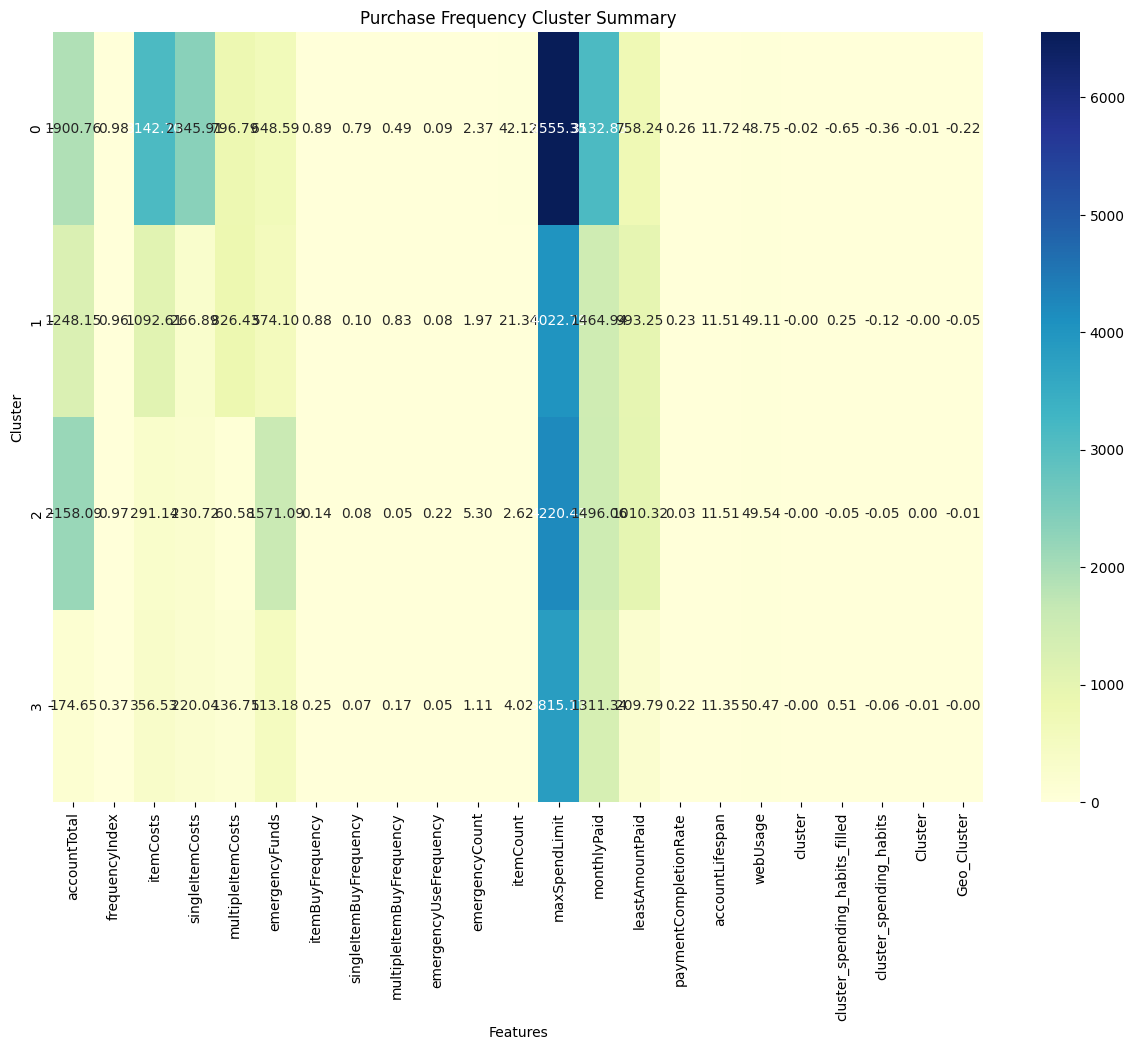

In [162]:
plt.figure(figsize=(15, 10))
sns.heatmap(cluster_analysis_numeric, annot=True, fmt=".2f", cmap="YlGnBu")
plt.title('Purchase Frequency Cluster Summary')
plt.ylabel('Cluster')
plt.xlabel('Features')
plt.show()

## 5- Describe the properties of the segment you have identified



### 1- Segmentation based on spending habits

We identify four distinct groups:

- **Cluster 0**: This group represents customers with moderately high spending habits, but less than the high spenders.
- **Cluster 1**: This group consists of customers with the lowest spending in comparison to the other groups.
- **Cluster 2**: This smallest group shows significantly high spending across all categories.
- **Cluster 3**: This group consists of customers with conservative spending habits, focusing on essential and multiple item purchases.

### Cluster 0: Moderately High Spenders

- **Quantity**: A substantial segment (5,509 customers).
- **Spending Profile**:
  - Moderate average account total ($802.46) and item costs ($517.24).
  - Balanced spending between single ($253.20) and multiple ($264.34) item purchases.
- **Financial Behavior**:
  - Considerable emergency funds ($526.66), suggesting a cautious financial approach.
  - Moderate max spend limit ($613.54).
- **Demographics and Web Usage**:
  - Average account lifespan of about 11.38 months.
  - Moderate web usage average (49.30), indicative of regular online activity.

### Cluster 1: Low Spenders

- **Quantity**: The largest group (2,643 customers).
- **Spending Profile**:
  - Lowest average account total ($2,026.33) and item costs ($1,334.28).
  - Focus on single item purchases ($822.12) over multiple item purchases ($512.53).
- **Financial Behavior**:
  - High emergency funds ($1,350.27), indicating a very conservative financial stance.
  - Lowest monthly payment ($911.22) with a lower payment completion rate (16.95%).
- **Demographics and Web Usage**:
  - Similar average account lifespan to other segments (11.73 months).
  - Average web usage (49.77), indicative of moderate online engagement.

### Cluster 2: High Spenders

- **Quantity**: Relatively small group (774 customers).
- **Spending Profile**:
  - High average account total ($5,292.42) and item costs ($2,504.03).
  - Predominant in single item purchases ($1,576.81) compared to multiple item purchases ($927.34).
- **Financial Behavior**:
  - High emergency funds ($2,930.81).
  - High max spend limit ($2,189.91).
- **Demographics and Web Usage**:
  - Average account lifespan of about 11.78 months.
  - Slightly lower web usage average (49.09).

### Cluster 3: Conservative Spenders

- **Quantity**: A small exclusive group (24 customers).
- **Spending Profile**:
  - Very high account total ($5,390.39) and item costs ($27,690.87).
  - High spending on both single ($21,422.88) and multiple ($6,267.98) item purchases.
- **Financial Behavior**:
  - Moderate emergency funds ($929.69).
  - Extremely high monthly payment ($3,274.88) with the highest payment completion rate (49.38%).
- **Demographics and Web Usage**:
  - Highest account lifespan (11.92 months).
  - Comparable web usage (49.17).

This segmentation reveals varied spending behaviors and financial strategies among the different consumer groups.



### 2- Segmentation by Purchase Frequency

We identify four distinct groups based on purchase frequency:

- **Cluster 0**: High-Value, Infrequent Shoppers
- **Cluster 1**: High-Value, Frequent Shoppers
- **Cluster 2**: Low-value, Occasional Shoppers
- **Cluster 3**: Emerging Spend Thrifts

### Cluster 0: High-Value, Infrequent Shoppers

- **Quantity**: A substantial group with moderate transaction frequency.
- **Spending Profile**:
  - High average account total and item costs.
  - Majority of spending in single item purchases.
- **Financial Behavior**:
  - High emergency funds and low usage frequency, suggesting a safety net.
  - High spending limits and moderate monthly payments with very low payment completion rates.
- **Demographics and Web Usage**:
  - Long account lifespan and moderate web usage.

### Cluster 1: High-Value, Frequent Shoppers

- **Quantity**: Significant number of transactions indicating frequent interactions.
- **Spending Profile**:
  - High item costs, predominantly on multiple items.
- **Financial Behavior**:
  - Lower reliance on emergency funds.
  - Highest average monthly payments and moderate payment completion rates.
- **Demographics and Web Usage**:
  - Similar account lifespan to Cluster 0 but slightly lower web usage.

### Cluster 2: Low-value, Occasional Shoppers

- **Quantity**: Lowest spending and transaction frequency among the clusters.
- **Spending Profile**:
  - Lowest average account and item costs.
- **Financial Behavior**:
  - Moderate emergency funds and low usage frequency.
- **Demographics and Web Usage**:
  - Similar to other clusters in account lifespan but the least web usage.

### Cluster 3: Emerging Spend Thrifts

- **Quantity**: Infrequent but deliberate spenders with emerging spending power.
- **Spending Profile**:
  - Low overall spending but higher single item costs than multiple item costs.
- **Financial Behavior**:
  - Moderate emergency funds with occasional use.
- **Demographics and Web Usage**:
  - Shortest average account lifespan among the clusters and highest web usage, suggesting a tech-savvy group.

Each cluster represents distinct spending and interaction patterns, reflecting their unique financial behaviors and engagement with web services.

## 6 - Describe the properties of the customers belonging to each segment


### 1 - Segmentation based on spending habits

We identify four distinct groups, each with unique spending patterns and behaviors:

#### Cluster 0: Moderately High Spenders
- **Quantity**: This segment includes a substantial number of customers totaling 5,509.
- **Spending Profile**: These customers have moderate average account totals and item costs. They balance their spending between single and multiple item purchases, neither too lavish nor too restrained.
- **Financial Behavior**: They maintain considerable emergency funds, demonstrating a cautious approach to finances, yet have moderate spending limits that allow for flexibility.
- **Demographics and Web Usage**: They exhibit an average lifespan for their accounts and engage moderately with online platforms, reflecting regular but not excessive digital activity.

#### Cluster 1: Low Spenders
- **Quantity**: This is the largest group, with 2,643 customers, indicating a common spending behavior.
- **Spending Profile**: Customers in this cluster spend the least on average, both overall and per item, focusing more on single item purchases which suggests a preference for necessary over discretionary spending.
- **Financial Behavior**: Despite their lower spending, they hold high emergency funds, showcasing a very conservative financial approach, and their payment completion rate is the lowest, emphasizing caution and possibly financial constraints.
- **Demographics and Web Usage**: Their account lifespan and web usage are average, indicating a balanced but cautious engagement with online and financial activities.

#### Cluster 2: High Spenders
- **Quantity**: This is the smallest group, with only 774 customers, highlighting its exclusivity.
- **Spending Profile**: They have the highest spending rates, both in total account value and per item, predominantly on single items which may suggest luxury or high-value purchases.
- **Financial Behavior**: They possess high emergency funds and spending limits, indicating significant financial freedom and confidence.
- **Demographics and Web Usage**: Their digital engagement is slightly lower than other groups, perhaps indicating a preference for high-quality, possibly bespoke shopping experiences that may not always be online.

#### Cluster 3: Conservative Spenders
- **Quantity**: An exclusive group, consisting of only 24 customers, focusing intensely on how and where they spend their money.
- **Spending Profile**: Despite their conservative label, they have very high account totals and item costs, suggesting selective but substantial investments in high-quality items, both single and multiple.
- **Financial Behavior**: Their emergency funds are moderate, yet they achieve the highest payment completion rate, demonstrating both financial preparedness and reliability.
- **Demographics and Web Usage**: They have the longest account lifespans and similar web usage to other groups, suggesting seasoned and deliberate use of digital platforms for their specific needs.

This segmentation effectively illustrates the diverse financial management styles and shopping preferences across different consumer groups, ranging from the very conservative to the more liberal spenders, each with distinct patterns of engagement and financial planning.

Here's a detailed description of the customer properties in each segment based on purchase frequency:

### 2 - Segmentation by Purchase Frequency

#### Cluster 0: High-Value, Infrequent Shoppers
- **Quantity**: Represents a substantial portion of customers who engage in transactions moderately frequently.
- **Spending Profile**: These customers have high average account totals and item costs, primarily focusing on single item purchases, which suggests a preference for quality or luxury over quantity.
- **Financial Behavior**: They maintain high emergency funds, which highlights their financial security. Despite having high spending limits, their payment completion rates are very low, indicating that they spend selectively and perhaps on a larger scale when they do.
- **Demographics and Web Usage**: These shoppers typically have a long account lifespan, showing loyalty or satisfaction with the service, with moderate web usage that implies balanced online engagement.

#### Cluster 1: High-Value, Frequent Shoppers
- **Quantity**: This cluster includes a significant number of customers who interact frequently, reflecting a high level of engagement.
- **Spending Profile**: Customers in this cluster tend to have high item costs, mostly spent on multiple items, indicating a preference for diversifying their purchases or buying in bulk.
- **Financial Behavior**: There's less reliance on emergency funds, suggesting confidence in their financial fluidity. They exhibit the highest average monthly payments among the groups, with moderately successful payment completion.
- **Demographics and Web Usage**: Their account lifespans are similar to those of Cluster 0, indicating loyalty, though they show slightly lower web usage, possibly due to established purchasing habits or preferences for in-person interactions.

#### Cluster 2: Low-value, Occasional Shoppers
- **Quantity**: This group has the lowest spending and transaction frequency, making them the most conservative or constrained buyers.
- **Spending Profile**: They show the lowest average account and item costs, typically focusing on necessities or smaller, less frequent indulgences.
- **Financial Behavior**: Their emergency funds are moderate, which, coupled with low usage frequency, suggests a careful approach to financial management.
- **Demographics and Web Usage**: Their account lifespan mirrors the broader trends but with the least web usage, indicating minimal engagement with digital shopping platforms.

#### Cluster 3: Emerging Spend Thrifts
- **Quantity**: Consists of infrequent but deliberate spenders who are beginning to increase their purchasing power.
- **Spending Profile**: These customers generally spend less overall but allocate more towards single high-cost items than multiple cheaper items, reflecting targeted or aspirational purchasing.
- **Financial Behavior**: They maintain moderate emergency funds and use them occasionally, which could indicate growing financial acumen or shifting priorities.
- **Demographics and Web Usage**: They have the shortest account lifespan, which might indicate newer engagement with the market or platform, and the highest web usage, suggesting a tech-savvy or younger demographic exploring their spending capacity.

This segmentation highlights varied consumer behaviors and spending patterns related to the frequency and value of purchases, with distinct approaches to financial management and digital engagement across different groups.